In [10]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob

In [196]:
data_t0 = np.load('/fastio2/dasha/double_pulse/data_11vars_NuTau_1_1_1.npy',mmap_mode='r')
data_m0 = np.load('/fastio2/dasha/double_pulse/data_11vars_NuMu_1_1_1.npy',mmap_mode='r')
data_e0 = np.load('/fastio2/dasha/double_pulse/data_11vars_NuE_1_1_1.npy',mmap_mode='r')
data_c0 = np.load('/fastio2/dasha/double_pulse/data_Corsika_11057_11058_10670_trial.npy',mmap_mode='r')

In [224]:
mask_t = data_t0['logan_veto']['SPE_rlogl']-data_t0['logan_veto']['Cascade_rlogl'] >-0.1
mask_m = data_m0['logan_veto']['SPE_rlogl']-data_m0['logan_veto']['Cascade_rlogl'] >-0.1
mask_e = data_e0['logan_veto']['SPE_rlogl']-data_e0['logan_veto']['Cascade_rlogl'] >-0.1
mask_c = data_c0['logan_veto']['SPE_rlogl']-data_c0['logan_veto']['Cascade_rlogl'] >-0.1

In [488]:
print(data_t.shape)

(10769,)


In [225]:
data_t = data_t0[mask_t]
data_m = data_m0[mask_m]
data_e = data_e0[mask_e]
data_c = data_c0[mask_c]

In [485]:
print(data_c['weight_it'])

[(       nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan)
 (       nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan)
 (       nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan,        nan)
 ...
 (0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489, 0.02728489)
 (0.0160224 , 0.0160224 , 0

In [659]:
masks_t = (data_t['preds']['n1'] >= 0.99) & (data_t['preds']['n4'] >= 0.8)
masks_m = (data_m['preds']['n1'] >= 0.99) & (data_m['preds']['n4'] >= 0.8)
masks_e = (data_e['preds']['n1'] >= 0.99) & (data_e['preds']['n4'] >= 0.8)
masks_c = (data_c['preds']['n1'] >= 0.99) & (data_c['preds']['n4'] >= 0.8)

In [588]:
def Plot2(Name,Label,data_t,data_m,data_e, data_c, xscale='linear',b =200,r =[0,1], loc = 8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.89,'#NuECC '+str(len(data_e)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.85,'#NuTauCC '+str(len(data_m)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.86,'#Corsika '+str(len(data_c)), transform=ax.transAxes, color = "black",fontsize=12)

    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_t, bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_m, bins =b, histtype = 'step',edgecolor ='b', lw =2, range = r, label = "NuMuCC")  
    ax.hist(data_e, bins =b, histtype = 'step',edgecolor ='g', lw =2, range = r, label = "NuECC")  
    ax.hist(data_c, bins =b, histtype = 'step',edgecolor ='k', lw =2, range = r, label = "Corsika")  
    
    plt.legend(loc=loc)
    plt.show()

def PlotW2(Name,Label,data_t,data_m,data_e,data_c, weight_t,weight_m,weight_e, weight_c,\
         xscale='linear',b =200,r =[0,1], loc =8):
    fig = plt.figure(figsize=(5, 5),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
   # ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
   # ax.text(0.01,0.92,'#NuMuCC '+str(len(data_m)), transform=ax.transAxes, color = "black",fontsize=12)
   # ax.text(0.01,0.89,'#NuECC '+str(len(data_e)), transform=ax.transAxes, color = "black",fontsize=12)
   # ax.text(0.01,0.86,'#Corsika '+str(len(data_c)), transform=ax.transAxes, color = "black",fontsize=12)
   
    ax.set_xlabel(Label, fontsize = 16)                                                              
    #ax.set_ylabel("#Events per Year", fontsize = 16)                                                   
    ax.hist(data_t, bins =b, weights = weight_t, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_m, bins =b, weights = weight_m, histtype = 'step',edgecolor ='b', lw =2, range = r, label = "NuMuCC")  
    ax.hist(data_e, bins =b, weights = weight_e, histtype = 'step',edgecolor ='g', lw =2, range = r, label = "NuECC")  
    ax.hist(data_c, bins =b, weights = weight_c, histtype = 'step',edgecolor ='k', lw =2, range = r, label = "Corsika")  
    
    #plt.legend(loc=loc)

In [254]:
def GetRates3(Name,cut1,cut2,net1,net2,sign1,sign2):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] >= cut2)
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] >= cut2)
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] >= cut2)
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] >= cut2)
    elif (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] <= cut2)
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] <= cut2)
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] <= cut2)
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] <= cut2)
    elif (sign2 == "more"):
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] >= cut2)
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] >= cut2)
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] >= cut2)
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] >= cut2)
    else:
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] <= cut2)
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] <= cut2)
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] <= cut2)
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] <= cut2)
       

    rate_t = np.sum(data_t['weight_val'][mask_t]) 
    rate_m = np.sum(data_m['weight_val'][mask_m]) 
    rate_e = np.sum(data_e['weight_val'][mask_e])
    rate_c = np.sum(data_c['weight_val'][mask_c])
   
    rate_t_err = np.sqrt(np.sum(np.square(data_t['weight_val'][mask_t]))) 
    rate_m_err = np.sqrt(np.sum(np.square(data_m['weight_val'][mask_m])))
    rate_e_err = np.sqrt(np.sum(np.square(data_e['weight_val'][mask_e])))
    rate_c_err = np.sqrt(np.sum(np.square(data_c['weight_val'][mask_c])))
    print(data_c['weight_val'][mask_c].shape)
   # print(data_c[mask_c])
    print(Name)
  
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_m,rate_m_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_e,rate_e_err))
    print("Corsika =   {0:.3f} +/- {1:.3f}".format(rate_c,rate_c_err))

def GetRates3M(Name,cut1,cut2,net1,net2,sign1,sign2,mask_t0,mask_m0,mask_e0,mask_c0):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] >= cut2) & mask_t0
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] >= cut2) & mask_m0
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] >= cut2) & mask_e0
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] >= cut2) & mask_c0
    elif (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] <= cut2) & mask_t0
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] <= cut2) & mask_m0
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] <= cut2) & mask_e0
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] <= cut2) & mask_c0
    elif (sign2 == "more"):
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] >= cut2) & mask_t0
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] >= cut2) & mask_m0
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] >= cut2) & mask_e0
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] >= cut2) & mask_c0
    else:
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] <= cut2) & mask_t0
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] <= cut2) & mask_m0
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] <= cut2) & mask_e0
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] <= cut2) & mask_c0
       

    rate_t = np.sum(data_t['weight_val'][mask_t]) 
    rate_m = np.sum(data_m['weight_val'][mask_m]) 
    rate_e = np.sum(data_e['weight_val'][mask_e])
    rate_c = np.sum(data_c['weight_val'][mask_c])
   
    rate_t_err = np.sqrt(np.sum(np.square(data_t['weight_val'][mask_t]))) 
    rate_m_err = np.sqrt(np.sum(np.square(data_m['weight_val'][mask_m])))
    rate_e_err = np.sqrt(np.sum(np.square(data_e['weight_val'][mask_e])))
    rate_c_err = np.sqrt(np.sum(np.square(data_c['weight_val'][mask_c])))
    print(data_c['weight_val'][mask_c].shape)
    #print(data_c[mask_c])

    print(Name)
  
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_m,rate_m_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_e,rate_e_err))
    print("Corsika =   {0:.3f} +/- {1:.3f}".format(rate_c,rate_c_err))



(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239


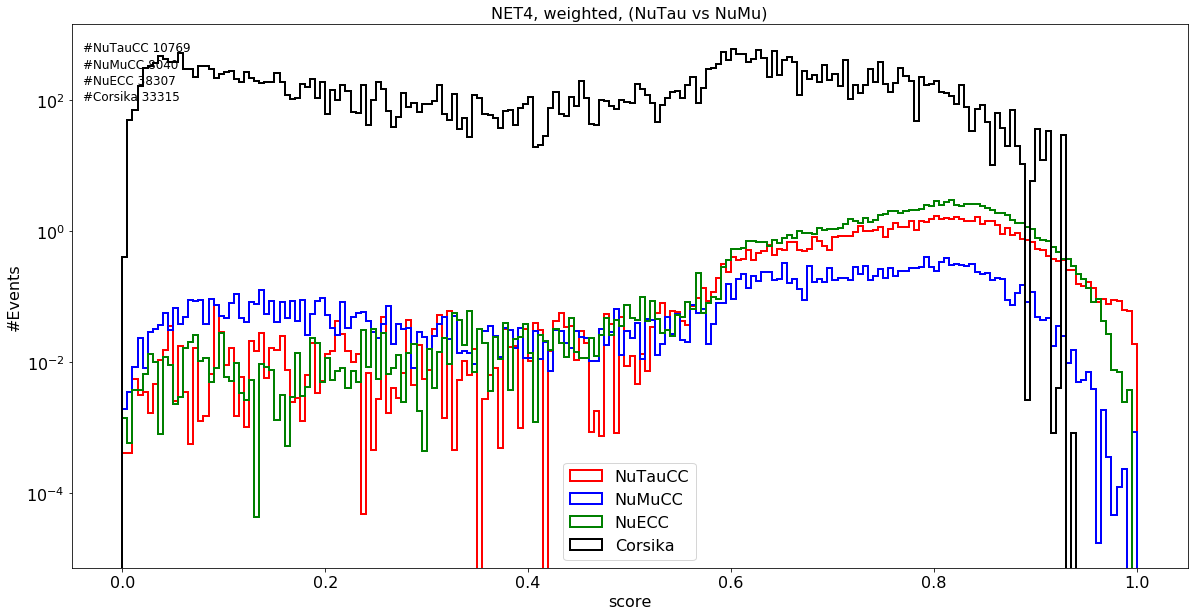

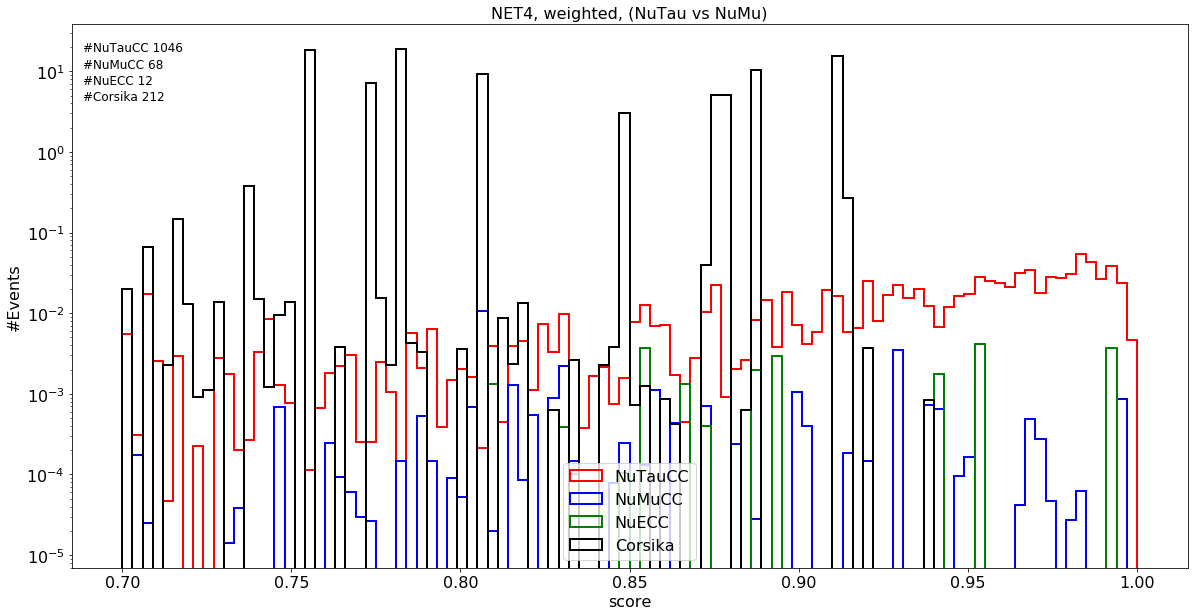

In [473]:
PlotW2("NET4, weighted, (NuTau vs NuMu)", "score", data_t['preds']['n4'],data_m['preds']['n4'],data_e['preds']['n4'],data_c['preds']['n4'],\
      data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'])
PlotW2("NET4, weighted, (NuTau vs NuMu)", "score", data_t['preds']['n4'][masks_t],data_m['preds']['n4'][masks_m],data_e['preds']['n4'][masks_e],\
       data_c['preds']['n4'][masks_c],data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],\
       data_c['weight_val'][masks_c],b=100,r = [0.7,1])
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239


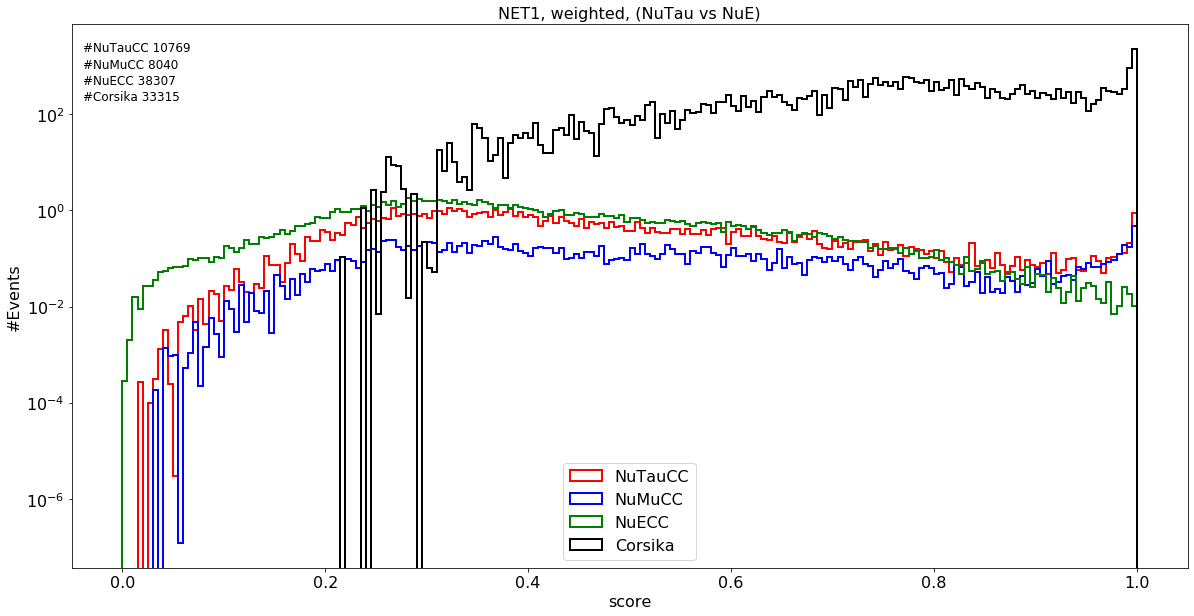

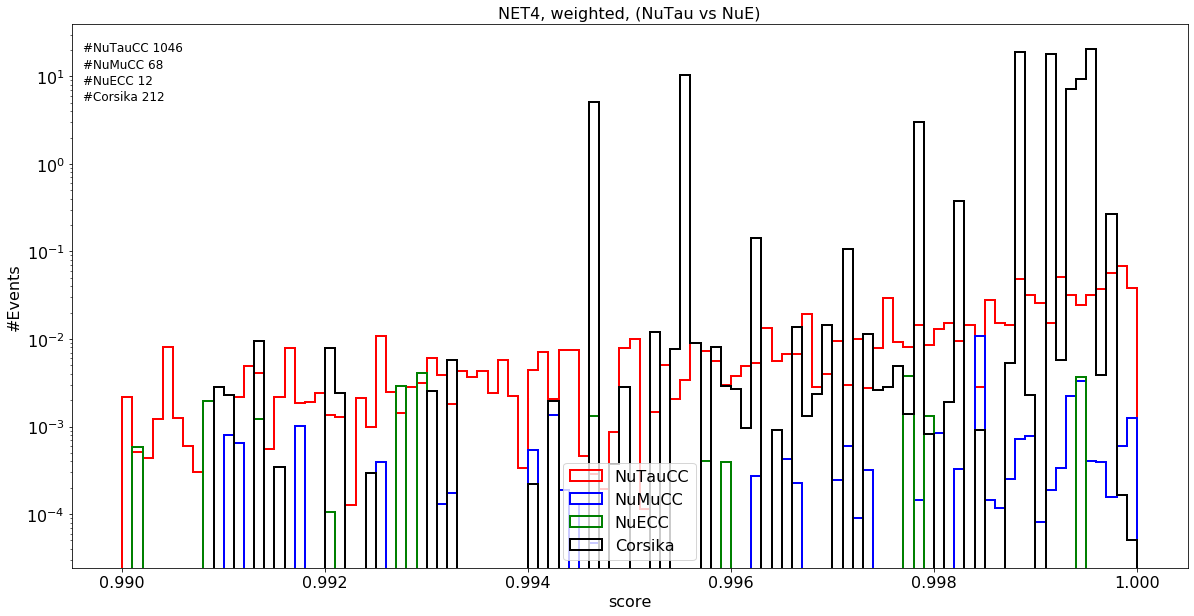

In [409]:
PlotW2("NET1, weighted, (NuTau vs NuE)", "score", data_t['preds']['n1'],data_m['preds']['n1'],data_e['preds']['n1'],data_c['preds']['n1'],\
      data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'])
PlotW2("NET4, weighted, (NuTau vs NuE)", "score", data_t['preds']['n1'][masks_t],data_m['preds']['n1'][masks_m],data_e['preds']['n1'][masks_e],\
       data_c['preds']['n1'][masks_c],data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],\
       data_c['weight_val'][masks_c],b=100,r = [0.99,1])
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")

In [257]:
data_t["qst"]['q'][:,0]

array([ 3065.475, 32489.75 ,  2052.15 , ..., 18710.125,   508.25 ,
        2988.125], dtype=float32)

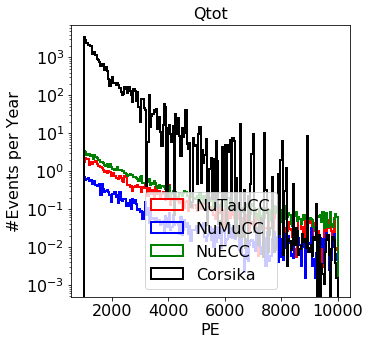

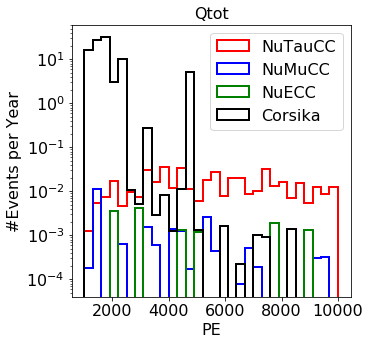

In [587]:
PlotW2("Qtot", "PE", data_t['qtot'],data_m['qtot'],data_e['qtot'],data_c['qtot'],\
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'], r=[1000,10000])
PlotW2("Qtot", "PE", data_t['qtot'][masks_t],data_m['qtot'][masks_m],data_e['qtot'][masks_e],data_c['qtot'][masks_c],\
       data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],data_c['weight_val'][masks_c],b=30, r=[1000,10000], loc =1)

In [469]:
Qt = 2000
mask3_t = data_t['qtot'] > Qt
mask3_m = data_m['qtot'] > Qt
mask3_e = data_e['qtot'] > Qt
mask3_c = data_c['qtot'] > Qt
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and QtotCut",0.99,0.8,"n1","n4","more","more",mask3_t,mask3_m,mask3_e,mask3_c)

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239
(75,)
Rates after NET1 and NET3 and QtotCut
NuTauCC = 0.842 +/- 0.048
NuMuCC =  0.017 +/- 0.004
NuECC =   0.022 +/- 0.008
Corsika =   18.747 +/- 11.909


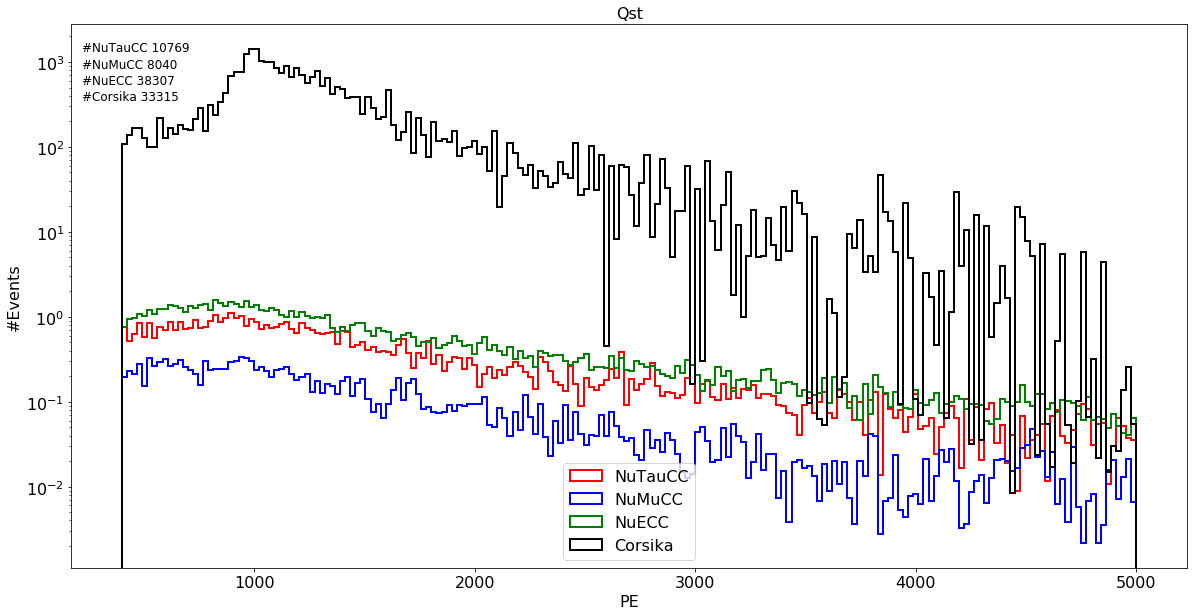

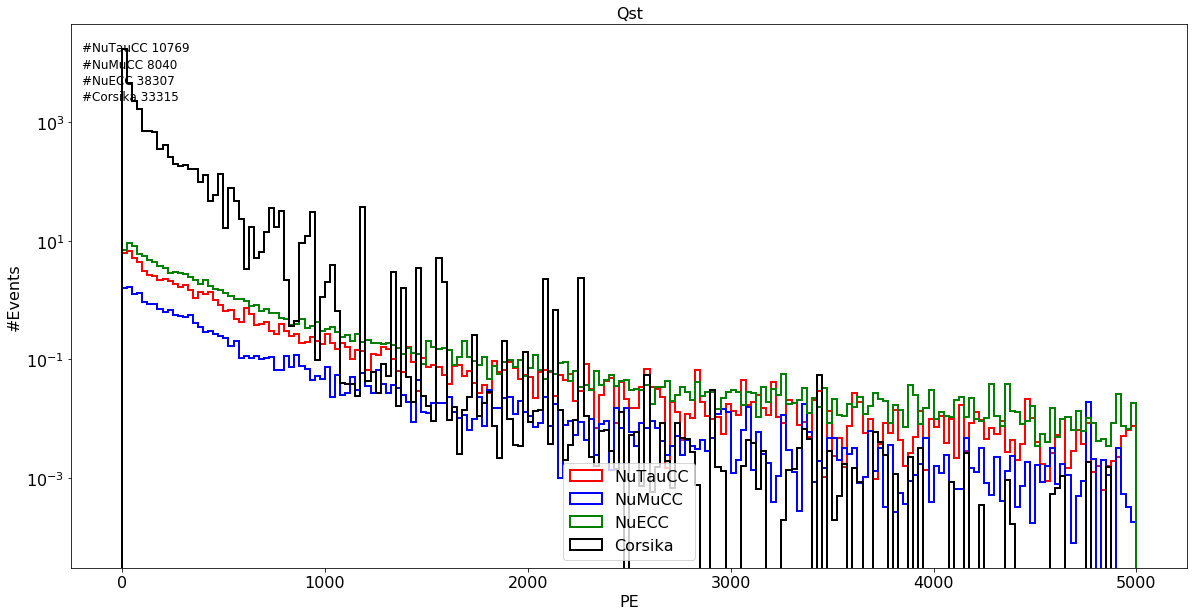

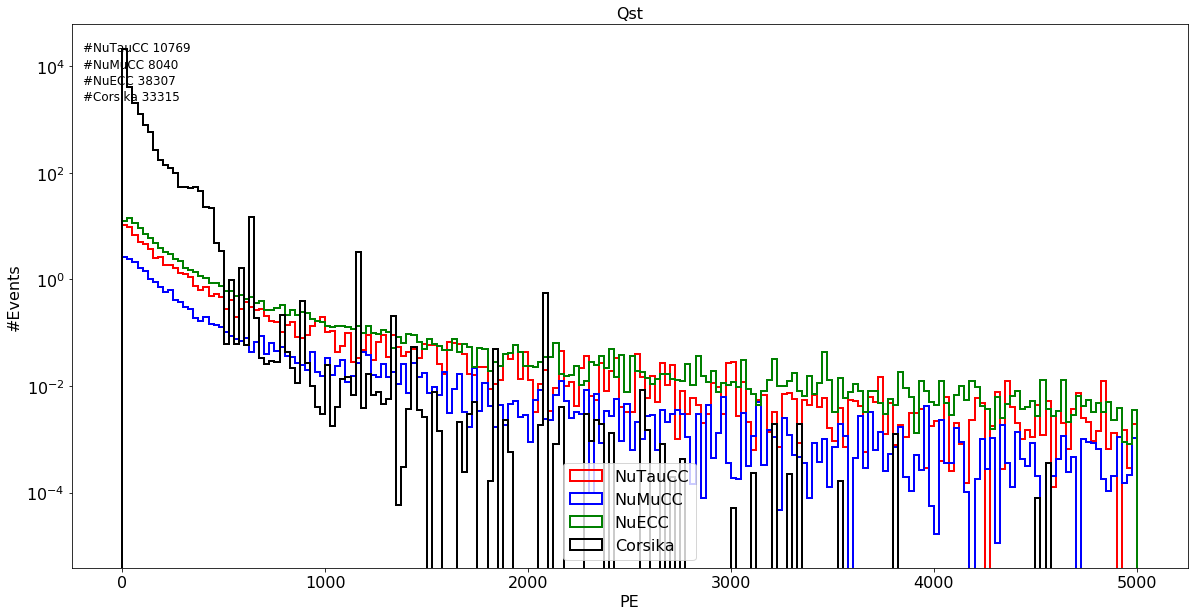

In [297]:
PlotW2("Qst", "PE", data_t['qst']['q'][:,0],data_m['qst']['q'][:,0],data_e['qst']['q'][:,0],data_c['qst']['q'][:,0],\
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'], r=[400,5000])
PlotW2("Qst", "PE", data_t['qst']['q'][:,1],data_m['qst']['q'][:,1],data_e['qst']['q'][:,1],data_c['qst']['q'][:,1],\
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'], r=[0,5000])
PlotW2("Qst", "PE", data_t['qst']['q'][:,2],data_m['qst']['q'][:,2],data_e['qst']['q'][:,2],data_c['qst']['q'][:,2],\
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'], r=[0,5000])

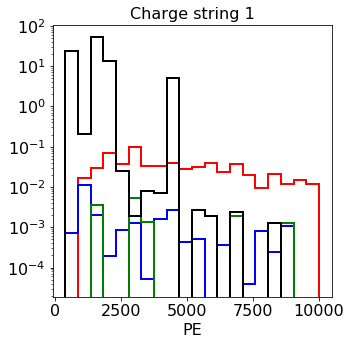

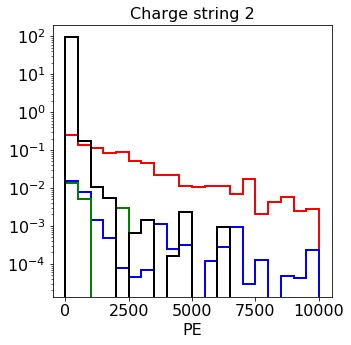

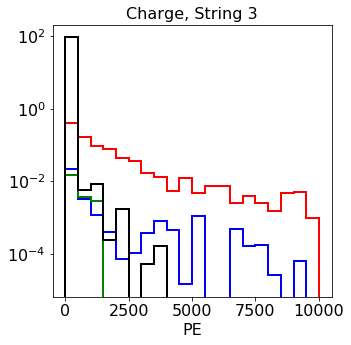

In [599]:
PlotW2("Charge string 1", "PE", data_t['qst']['q'][:,0][masks_t],data_m['qst']['q'][:,0][masks_m],data_e['qst']['q'][:,0][masks_e],data_c['qst']['q'][:,0][masks_c],\
       data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],data_c['weight_val'][masks_c], b =20, r=[400,10000],loc =1)
PlotW2("Charge string 2", "PE", data_t['qst']['q'][:,1][masks_t],data_m['qst']['q'][:,1][masks_m],data_e['qst']['q'][:,1][masks_e],data_c['qst']['q'][:,1][masks_c],\
       data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],data_c['weight_val'][masks_c], b =20, r=[0,10000],loc =1)
PlotW2("Charge, String 3", "PE", data_t['qst']['q'][:,2][masks_t],data_m['qst']['q'][:,2][masks_m],data_e['qst']['q'][:,2][masks_e],data_c['qst']['q'][:,2][masks_c],\
       data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],data_c['weight_val'][masks_c], b =20,  r=[0,10000],loc =1)

In [338]:
Qst = 500
mask3_t = data_t['qst']['q'][:,0] > Qt
mask3_m = data_m['qst']['q'][:,0] > Qt
mask3_e = data_e['qst']['q'][:,0] > Qt
mask3_c = data_c['qst']['q'][:,0] > Qt
GetRates3M("Rates after NET1 and NET3 and Qst1 Cut",0.99,0.8,"n1","n4","more","more",mask3_t,mask3_m,mask3_e,mask3_c)

(76,)
Rates after NET1 and NET3 and Qst1 Cut
NuTauCC = 0.835 +/- 0.048
NuMuCC =  0.016 +/- 0.004
NuECC =   0.022 +/- 0.008
Corsika =   23.830 +/- 12.934


In [405]:
Qst = 100
mask3_t = data_t['qst']['q'][:,1] > Qst
mask3_m = data_m['qst']['q'][:,1] > Qst
mask3_e = data_e['qst']['q'][:,1] > Qst
mask3_c = data_c['qst']['q'][:,1] > Qst
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and Qst2 Cut",0.99,0.8,"n1","n4","more","more",mask3_t,mask3_m,mask3_e,mask3_c)

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239
(77,)
Rates after NET1 and NET3 and Qst2 Cut
NuTauCC = 0.821 +/- 0.047
NuMuCC =  0.028 +/- 0.011
NuECC =   0.018 +/- 0.007
Corsika =   10.638 +/- 10.333


In [470]:
Qst = 50
mask3_t = data_t['qst']['q'][:,2] > Qst
mask3_m = data_m['qst']['q'][:,2] > Qst
mask3_e = data_e['qst']['q'][:,2] > Qst
mask3_c = data_c['qst']['q'][:,2] > Qst
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and Qst3 Cut",0.99,0.8,"n1","n4","more","more",mask3_t,mask3_m,mask3_e,mask3_c)

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239
(72,)
Rates after NET1 and NET3 and Qst3 Cut
NuTauCC = 0.808 +/- 0.044
NuMuCC =  0.028 +/- 0.011
NuECC =   0.018 +/- 0.007
Corsika =   0.310 +/- 0.267


In [471]:
Qt,Qst1,Qst2,Qst3 = 1200,500,50,50
mask3_t = (data_t['qst']['q'][:,0] > Qst1) & (data_t['qst']['q'][:,1] > Qst2) & (data_t['qst']['q'][:,2] > Qst3) & (data_t['qtot'] > Qt)  
mask3_m = (data_m['qst']['q'][:,0] > Qst1) & (data_m['qst']['q'][:,1] > Qst2) & (data_m['qst']['q'][:,2] > Qst3) & (data_m['qtot'] > Qt) 
mask3_e = (data_e['qst']['q'][:,0] > Qst1) & (data_e['qst']['q'][:,1] > Qst2) & (data_e['qst']['q'][:,2] > Qst3) & (data_e['qtot'] > Qt) 
mask3_c = (data_c['qst']['q'][:,0] > Qst1) & (data_c['qst']['q'][:,1] > Qst2) & (data_c['qst']['q'][:,2] > Qst3) & (data_c['qtot'] > Qt) 
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and Qst2 Cut",0.99,0.8,"n1","n4","more","more",mask3_t,mask3_m,mask3_e,mask3_c)

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239
(69,)
Rates after NET1 and NET3 and Qst2 Cut
NuTauCC = 0.808 +/- 0.044
NuMuCC =  0.028 +/- 0.011
NuECC =   0.018 +/- 0.007
Corsika =   0.310 +/- 0.267


In [603]:
def Scatter2d(data_t1,data_t2,data_m1,data_m2,data_e1,data_e2,data_c1,data_c2,l1=[0,1],l2=[0,1], label1 ="label",label2="label"):
    fig, ax = plt.subplots(nrows=1, ncols=4,sharex = True,sharey=True, figsize=(20,5),facecolor ='w')
    #plt.title('Network scores', fontdict={'fontsize': 14, 'fontweight': 'medium'})

    plt.subplot(1,4,1)
    ax1 = plt.gca()
    ax1.set_xlim(l1)
    ax1.set_ylim(l2)
    ax1.set_title('Single')
    plt.scatter(data_e1,data_e2, c = 'g', s =0.9)
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax1.tick_params(axis='both', which='major', labelsize=10)
    ax1.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(1,4,2)
    ax2 = plt.gca()
    ax2.set_xlim(l1)
    ax2.set_ylim(l2)
    ax2.set_title('Track')
    plt.scatter(data_m1,data_m2, c = 'b', s =0.9)
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax2.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(1,4,3)
    ax3 = plt.gca()
    ax3.set_xlim(l1)
    ax3.set_ylim(l2)
    ax3.set_title('Double')
    plt.scatter(data_t1,data_t2, c = 'r', s =0.9)
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax3.tick_params(axis='both', which='major', labelsize=10)
    ax3.tick_params(axis='both', which='minor', labelsize=8)


    plt.subplot(1,4,4)
    ax4 = plt.gca()
    ax4.set_xlim(l1)
    ax4.set_ylim(l2)
    ax4.set_title('Muons/Corsika')
    plt.scatter(data_c1,data_c2, c = 'k', s =0.9)
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax4.tick_params(axis='both', which='major', labelsize=10)
    ax4.tick_params(axis='both', which='minor', labelsize=8)



    plt.show()

In [594]:
def Hist2d(data_t1,data_t2,data_m1,data_m2,data_e1,data_e2,data_c1,data_c2,\
            weight_t,weight_m,weight_e,weight_c,l1=[0,1],l2=[0,1], label1 ="label",label2="label"):
    fig, ax = plt.subplots(nrows=1, ncols=4,sharex = True,sharey=True, figsize=(20,5),facecolor ='w')
    #plt.title('Network scores', fontdict={'fontsize': 14, 'fontweight': 'medium'})

    plt.subplot(1,4,1)
    ax1 = plt.gca()
    ax1.set_xlim(l1)
    ax1.set_ylim(l2)
    ax1.set_title('Single')
    plt.hist2d(data_t1,data_t2, weights = weight_t, bins = 50, range = [l1,l2],cmap = 'Reds', vmax = 0.6)
    plt.xlabel(label1,  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylabel(label2,  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    ax1.tick_params(axis='both', which='major', labelsize=10)
    ax1.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(1,4,2)
    ax2 = plt.gca()
    ax2.set_xlim(l1)
    ax2.set_ylim(l2)
    ax2.set_title('Track')
    plt.hist2d(data_m1,data_m2, weights = weight_m, bins = 50, range = [l1,l2],cmap = 'Blues', vmax = 0.6)
    plt.xlabel(label1,  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylabel(label2,  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    ax2.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(1,4,3)
    ax3 = plt.gca()
    ax3.set_xlim(l1)
    ax3.set_ylim(l2)
    ax3.set_title('Double')
    plt.hist2d(data_e1,data_e2, weights = weight_e, bins = 50, range = [l1,l2],cmap = 'Greens', vmax = 0.6)
    plt.xlabel(label1,  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylabel(label2,  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    ax3.tick_params(axis='both', which='major', labelsize=10)
    ax3.tick_params(axis='both', which='minor', labelsize=8)


    plt.subplot(1,4,4)
    ax4 = plt.gca()
    ax4.set_xlim(l1)
    ax4.set_ylim(l2)
    ax4.set_title('Muons')
    plt.hist2d(data_c1,data_c2, weights = weight_c, bins = 50, range = [l1,l2],cmap = 'Greys', vmax = 0.6)
    plt.xlabel(label1,  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylabel(label2,  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    ax4.tick_params(axis='both', which='major', labelsize=10)
    ax4.tick_params(axis='both', which='minor', labelsize=8)



    plt.show()

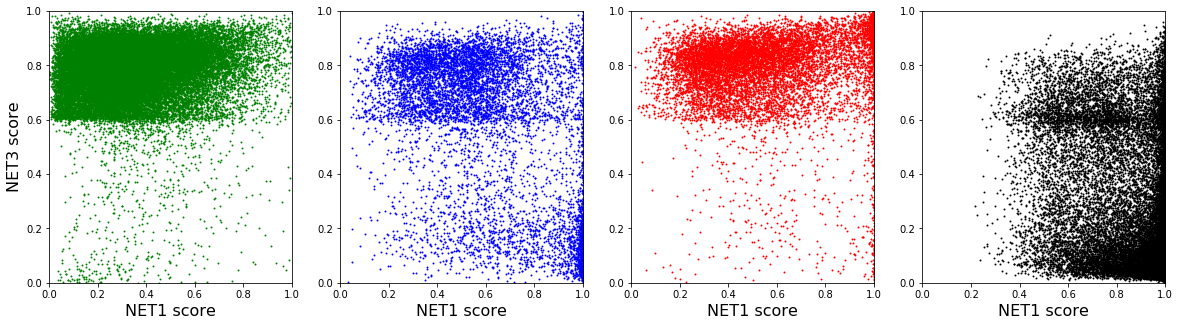

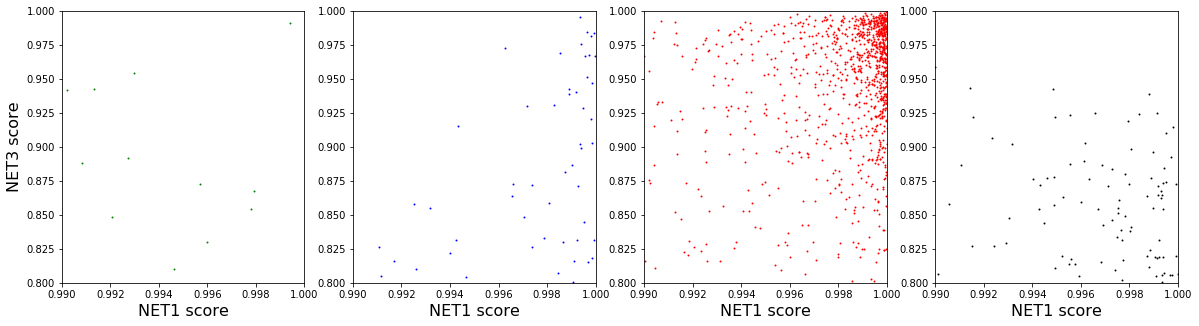

In [597]:
Scatter2d(data_t['preds']['n1'],data_t['preds']['n4'],data_m['preds']['n1'],data_m['preds']['n4'],data_e['preds']['n1'],data_e['preds']['n4'],\
          data_c['preds']['n1'],data_c['preds']['n4'],l1=[0,1],l2=[0,1], label1 ="NET1 score",label2="NET3 score")
Scatter2d(data_t['preds']['n1'],data_t['preds']['n4'],data_m['preds']['n1'],data_m['preds']['n4'],data_e['preds']['n1'],data_e['preds']['n4'],\
          data_c['preds']['n1'],data_c['preds']['n4'],l1=[0.99,1],l2=[0.8,1], label1 ="NET1 score",label2="NET3 score")

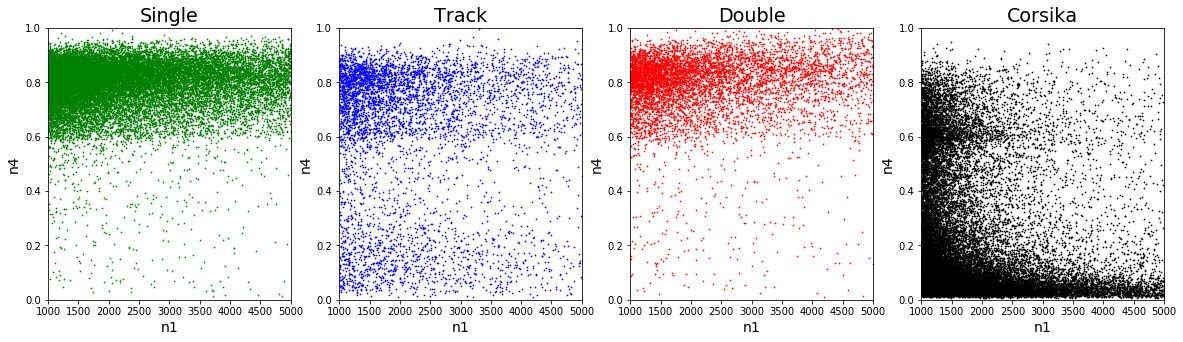

In [262]:
Scatter2d(data_t['qtot'],data_t['preds']['n4'],data_m['qtot'],data_m['preds']['n4'],data_e['qtot'],data_e['preds']['n4'],\
          data_c['qtot'],data_c['preds']['n4'],l1=[1000,5000],l2=[0,1], label1 ="n1",label2="n4")

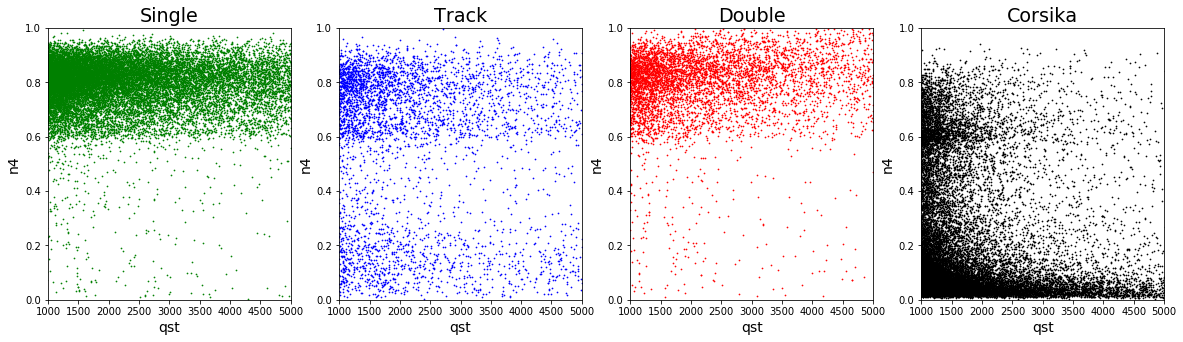

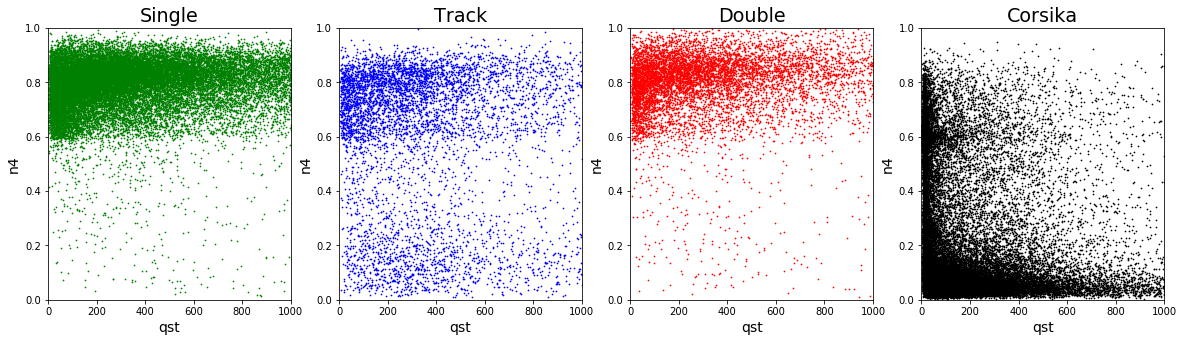

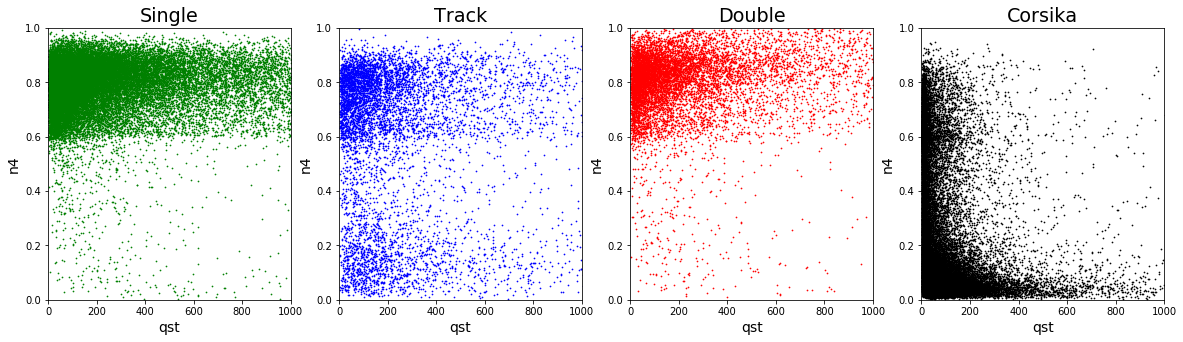

In [319]:
Scatter2d(data_t['qst']['q'][:,0],data_t['preds']['n4'],data_m['qst']['q'][:,0],data_m['preds']['n4'],data_e['qst']['q'][:,0],data_e['preds']['n4'],\
          data_c['qst']['q'][:,0],data_c['preds']['n4'],l1=[1000,5000],l2= [0,1], label1 ="qst",label2="n4")
Scatter2d(data_t['qst']['q'][:,1],data_t['preds']['n4'],data_m['qst']['q'][:,1],data_m['preds']['n4'],data_e['qst']['q'][:,1],data_e['preds']['n4'],\
          data_c['qst']['q'][:,1],data_c['preds']['n4'],l1=[0,1000],l2= [0,1], label1 ="qst",label2="n4")
Scatter2d(data_t['qst']['q'][:,2],data_t['preds']['n4'],data_m['qst']['q'][:,2],data_m['preds']['n4'],data_e['qst']['q'][:,2],data_e['preds']['n4'],\
          data_c['qst']['q'][:,2],data_c['preds']['n4'],l1=[0,1000],l2= [0,1], label1 ="qst",label2="n4")

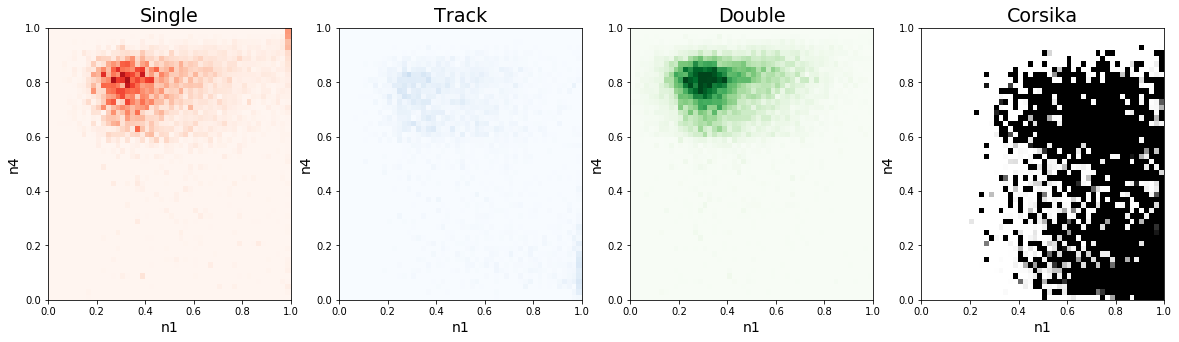

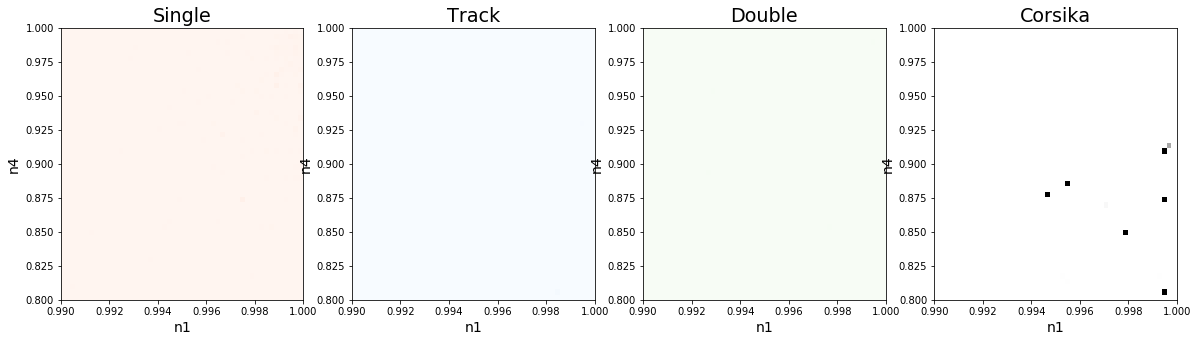

In [532]:
Hist2d(data_t['preds']['n1'],data_t['preds']['n4'],data_m['preds']['n1'],data_m['preds']['n4'],data_e['preds']['n1'],data_e['preds']['n4'],\
       data_c['preds']['n1'],data_c['preds']['n4'],data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'],\
       l1=[0,1],l2=[0,1], label1 ="n1",label2="n4")
Hist2d(data_t['preds']['n1'],data_t['preds']['n4'],data_m['preds']['n1'],data_m['preds']['n4'],data_e['preds']['n1'],data_e['preds']['n4'],\
     data_c['preds']['n1'],data_c['preds']['n4'],data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'],\
       l1=[0.99,1],l2=[0.8,1], label1 ="n1",label2="n4")

In [570]:
data_c2 = np.load('/fastio2/dasha/double_pulse/data_Corsika_11057_00000_00999.npy',mmap_mode='r')
#print(31536000*data_c2['weight_val'])

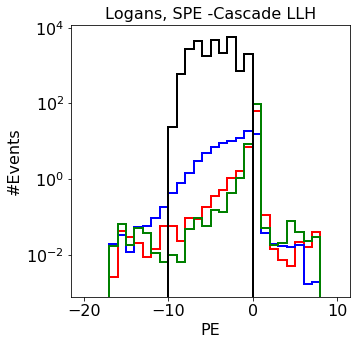

In [578]:
PlotW2("Logans, SPE -Cascade LLH", "PE", data_t0['logan_veto']['SPE_rlogl']-data_t0['logan_veto']['Cascade_rlogl'],\
       data_m0['logan_veto']['SPE_rlogl']-data_m0['logan_veto']['Cascade_rlogl'],\
       data_e0['logan_veto']['SPE_rlogl']-data_e0['logan_veto']['Cascade_rlogl'],\
       data_c2['logan_veto']['SPE_rlogl']- data_c2['logan_veto']['Cascade_rlogl'],\
       data_t0['weight_val'],data_m0['weight_val'],data_e0['weight_val'],31536000*data_c2['weight_val'],b =30, r=[-20,10])

/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


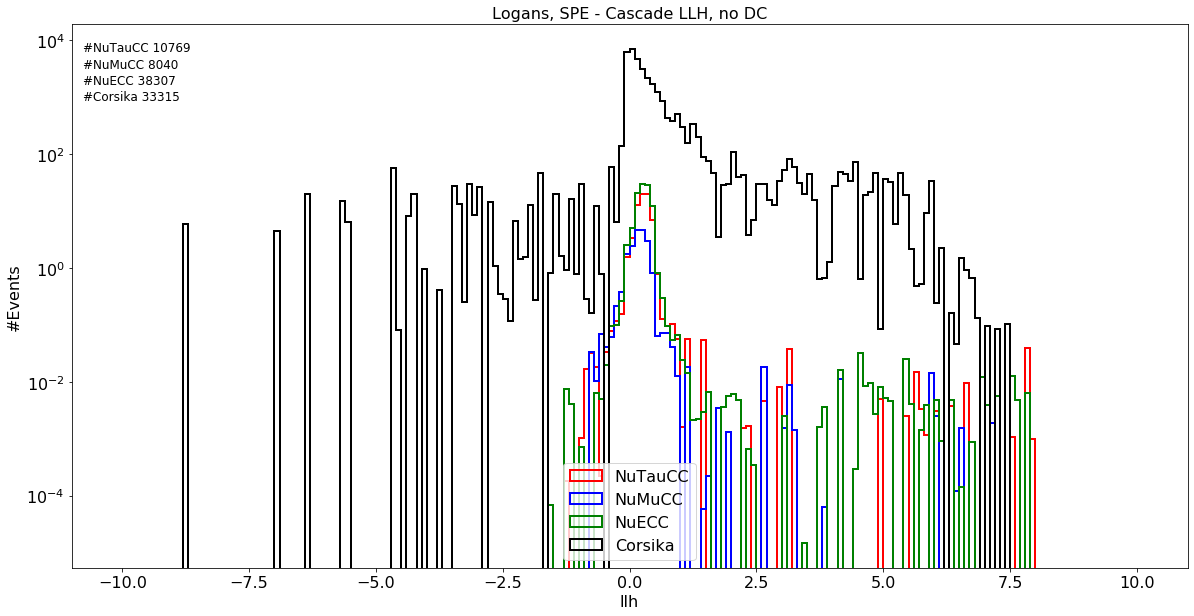

In [359]:
PlotW2("Logans, SPE - Cascade LLH, no DC", "llh", data_t['logan_veto']['SPE_rlogl_noDC']-data_t['logan_veto']['Cascade_rlogl_noDC'],\
       data_m['logan_veto']['SPE_rlogl_noDC']-data_m['logan_veto']['Cascade_rlogl_noDC'],\
       data_e['logan_veto']['SPE_rlogl_noDC']-data_e['logan_veto']['Cascade_rlogl_noDC'],\
       data_c['logan_veto']['SPE_rlogl_noDC']- data_c['logan_veto']['Cascade_rlogl_noDC'],\
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'], r=[-10,10])

In [402]:
Qst = -0.1
mask3_t = data_t['logan_veto']['SPE_rlogl_noDC']-data_t['logan_veto']['Cascade_rlogl_noDC'] > Qst
mask3_m = data_m['logan_veto']['SPE_rlogl_noDC']-data_m['logan_veto']['Cascade_rlogl_noDC'] > Qst
mask3_e = data_e['logan_veto']['SPE_rlogl_noDC']-data_e['logan_veto']['Cascade_rlogl_noDC'] > Qst
mask3_c = data_c['logan_veto']['SPE_rlogl_noDC']-data_c['logan_veto']['Cascade_rlogl_noDC'] > Qst
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and LLH no DC",0.99,0.8,"n1","n4","more","more",mask3_t,mask3_m,mask3_e,mask3_c)

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239
(93,)
Rates after NET1 and NET3 and LLH no DC
NuTauCC = 0.854 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239


/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


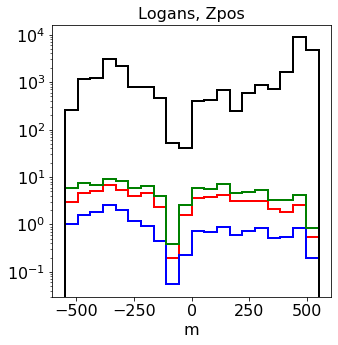

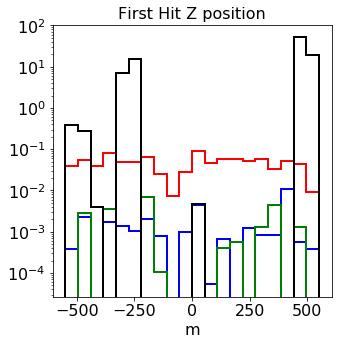

In [590]:
PlotW2("Logans, Zpos", "m", data_t['logan_veto']['FirstHitZ'],data_m['logan_veto']['FirstHitZ'],data_e['logan_veto']['FirstHitZ'],\
       data_c['logan_veto']['FirstHitZ'],data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'],b = 20, r=[-550,550])
PlotW2("First Hit Z position", "m", data_t['logan_veto']['FirstHitZ'][masks_t],data_m['logan_veto']['FirstHitZ'][masks_m],data_e['logan_veto']['FirstHitZ'][masks_e],\
       data_c['logan_veto']['FirstHitZ'][masks_c],data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],data_c['weight_val'][masks_c], b =20, r=[-550,550])

In [592]:
Qst = 475
mask3_t = data_t['logan_veto']['FirstHitZ'] < Qst
mask3_m = data_m['logan_veto']['FirstHitZ'] < Qst
mask3_e = data_e['logan_veto']['FirstHitZ'] < Qst
mask3_c = data_c['logan_veto']['FirstHitZ'] < Qst
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and First Hit Z Cut",0.99,0.8,"n1","n4","more","more",mask3_t,mask3_m,mask3_e,mask3_c)

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239
(28,)
Rates after NET1 and NET3 and First Hit Z Cut
NuTauCC = 0.843 +/- 0.048
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   30.162 +/- 18.784


In [400]:
GetRates3("Rates after NET1 and NET3",0.99,0.7,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and Gcut",0.99,0.7,"n1","n4","more","more",mask1_t,mask1_m,mask1_e,mask1_c)

(212,)
Rates after NET1 and NET3
NuTauCC = 0.937 +/- 0.053
NuMuCC =  0.031 +/- 0.012
NuECC =   0.022 +/- 0.008
Corsika =   93.804 +/- 35.185
(1,)
Rates after NET1 and NET3 and Gcut
NuTauCC = 0.604 +/- 0.041
NuMuCC =  0.008 +/- 0.002
NuECC =   0.017 +/- 0.007
Corsika =   15.492 +/- 15.492


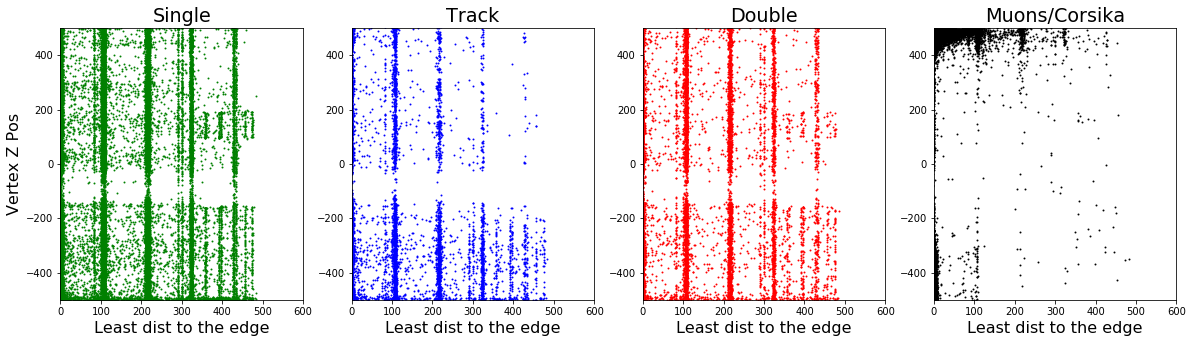

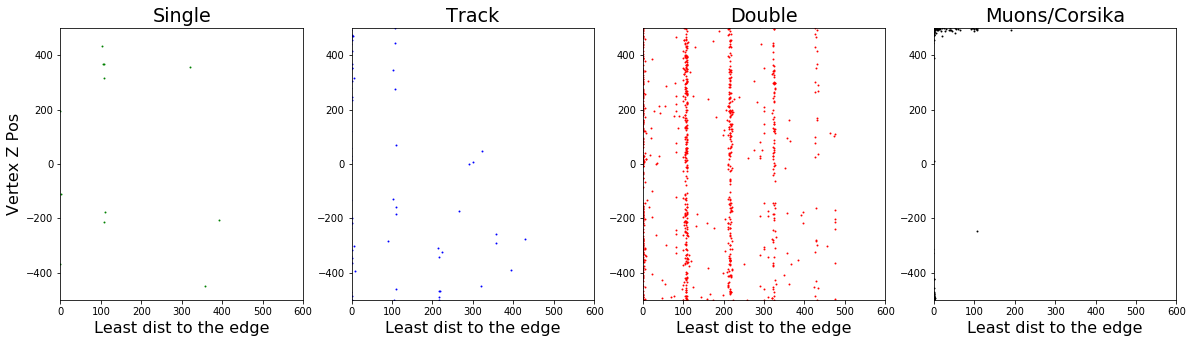

In [604]:
Scatter2d(data_t['logan_veto']['LeastDistanceToPolygon_Veto'],data_t['logan_veto']['VHESelfVetoVertexPosZ'],\
          data_m['logan_veto']['LeastDistanceToPolygon_Veto'],data_m['logan_veto']['VHESelfVetoVertexPosZ'],\
          data_e['logan_veto']['LeastDistanceToPolygon_Veto'],data_e['logan_veto']['VHESelfVetoVertexPosZ'],\
          data_c['logan_veto']['LeastDistanceToPolygon_Veto'],data_c['logan_veto']['VHESelfVetoVertexPosZ'],\
          l1=[0,600],l2=[-500,500], label2 ="Vertex Z Pos",label1="Least dist to the edge")
Scatter2d(data_t['logan_veto']['LeastDistanceToPolygon_Veto'][masks_t],data_t['logan_veto']['VHESelfVetoVertexPosZ'][masks_t],\
          data_m['logan_veto']['LeastDistanceToPolygon_Veto'][masks_m],data_m['logan_veto']['VHESelfVetoVertexPosZ'][masks_m],\
          data_e['logan_veto']['LeastDistanceToPolygon_Veto'][masks_e],data_e['logan_veto']['VHESelfVetoVertexPosZ'][masks_e],\
          data_c['logan_veto']['LeastDistanceToPolygon_Veto'][masks_c],data_c['logan_veto']['VHESelfVetoVertexPosZ'][masks_c],\
          l1=[0,600],l2=[-500,500], label2 ="Vertex Z Pos",label1="Least dist to the edge")

In [268]:
contain = 10
b = 400
m = - 1./3.
bottomz = -200
bottome = 75

mask1_t = (data_t['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_t['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_t['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_t['logan_veto']["LeastDistanceToPolygon_Veto"] + data_t['logan_veto']['VHESelfVetoVertexPosZ']) < b)
mask1_m = (data_m['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_m['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_m['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_m['logan_veto']["LeastDistanceToPolygon_Veto"] +data_m['logan_veto']['VHESelfVetoVertexPosZ']) < b)
mask1_e = (data_e['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_e['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_e['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_e['logan_veto']["LeastDistanceToPolygon_Veto"] +data_e['logan_veto']['VHESelfVetoVertexPosZ']) < b)
mask1_c = (data_c['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_c['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_c['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_c['logan_veto']["LeastDistanceToPolygon_Veto"] +data_c['logan_veto']['VHESelfVetoVertexPosZ']) < b)

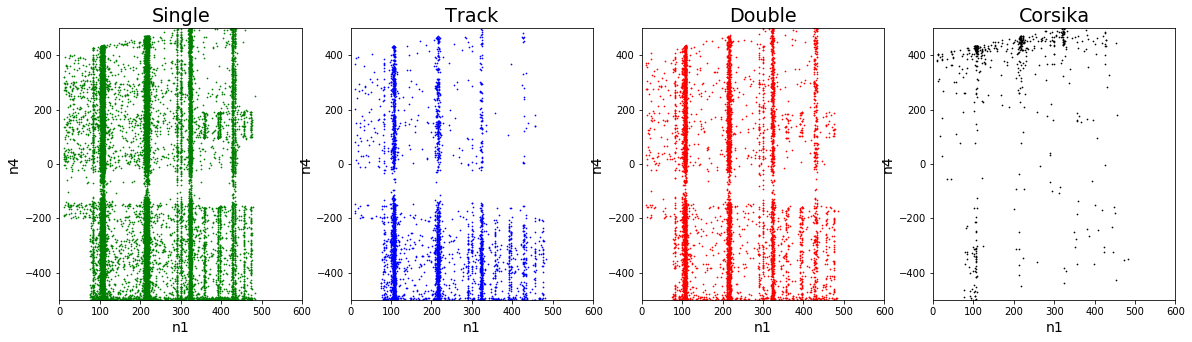

In [269]:
Scatter2d(data_t[mask1_t]['logan_veto']['LeastDistanceToPolygon_Veto'],data_t[mask1_t]['logan_veto']['VHESelfVetoVertexPosZ'],\
          data_m[mask1_m]['logan_veto']['LeastDistanceToPolygon_Veto'],data_m[mask1_m]['logan_veto']['VHESelfVetoVertexPosZ'],\
          data_e[mask1_e]['logan_veto']['LeastDistanceToPolygon_Veto'],data_e[mask1_e]['logan_veto']['VHESelfVetoVertexPosZ'],\
          data_c[mask1_c]['logan_veto']['LeastDistanceToPolygon_Veto'],data_c[mask1_c]['logan_veto']['VHESelfVetoVertexPosZ'],\
          l1=[0,600],l2=[-500,500], label1 ="n1",label2="n4")

In [398]:
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and Gcut",0.99,0.7,"n1","n4","more","more",mask1_t,mask1_m,mask1_e,mask1_c)
GetRates3M("Rates after NET1 and NET3 and Gcut",0.99,0.7,"n1","n4","more","more",mask1_t & mask3_t,mask1_m & mask3_m,mask1_e & mask3_e,mask1_c & mask3_c)

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239
(1,)
Rates after NET1 and NET3 and Gcut
NuTauCC = 0.604 +/- 0.041
NuMuCC =  0.008 +/- 0.002
NuECC =   0.017 +/- 0.007
Corsika =   15.492 +/- 15.492
(1,)
Rates after NET1 and NET3 and Gcut
NuTauCC = 0.418 +/- 0.037
NuMuCC =  0.005 +/- 0.002
NuECC =   0.004 +/- 0.003
Corsika =   15.492 +/- 15.492


In [321]:
mask2_t = (data_t['preds']['n1'] >= 0.99) & (data_t['preds']['n4'] >= 0.7)
mask2_m = (data_m['preds']['n1'] >= 0.99) & (data_m['preds']['n4'] >= 0.7)
mask2_e = (data_e['preds']['n1'] >= 0.99) & (data_e['preds']['n4'] >= 0.7)
mask2_c = (data_c['preds']['n1'] >= 0.99) & (data_c['preds']['n4'] >= 0.7)

In [288]:
n = data_c[mask2_c & mask1_c]
print(n['logan_veto'],n['llhcut'],n['preds'])
print(n['ti'],n['moi'],n['map'],n['qtot'],n['qst'])

[(7.7037706, 7.648824, 7.7037706, 7.648824, -233.45, -247.46675, 107.202736)] [0.05494628] [(0.9995308, 0.00924283, 0.99941754, 0.9100038)]
[[1.43392705e+04 2.34115839e-01 2.21743906e+04 2.47349512e+04]] [31959294.] [((0, 4294967295, 1651, 0), 147, [19, 15, 12], 147, [19, 15, 12], 147, [19, 15, 12], 87, [17, 13, 10], 67, [3, 3, 3])] [1043.625] [[(814.275, 12,     0.   ) ( 43.05 , 20, 15607.295)
  ( 31.125, 13, 15664.13 )]]


In [374]:
print(len(data_t[data_t['hese']['vheselfveto'] == True])/len(data_t))

0.6252205404401523


In [396]:
Qst = 475
mask3_t = data_t['hese']['vheselfveto'] == False
mask3_m = data_m['hese']['vheselfveto'] == False
mask3_e = data_e['hese']['vheselfveto'] == False
mask3_c = data_c['hese']['vheselfveto'] == False
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and HESE veto Cut",0.99,0.8,"n1","n4","more","more",mask3_t,mask3_m,mask3_e,mask3_c)

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239
(1,)
Rates after NET1 and NET3 and HESE veto Cut
NuTauCC = 0.392 +/- 0.036
NuMuCC =  0.004 +/- 0.002
NuECC =   0.004 +/- 0.003
Corsika =   15.492 +/- 15.492


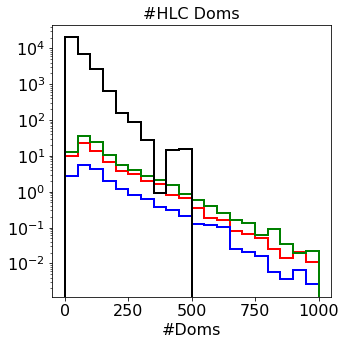

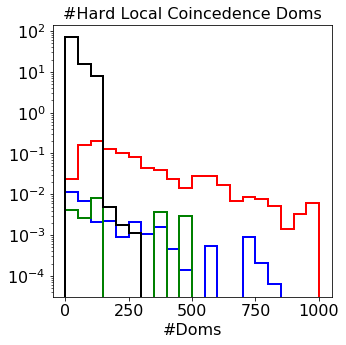

In [598]:
PlotW2("#HLC Doms","#Doms",data_t['map']['hlc'],data_m['map']['hlc'],data_e['map']['hlc'],data_c['map']['hlc'],\
      data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'], r=[0,1000],b =20)
PlotW2("#Hard Local Coincedence Doms","#Doms",data_t['map']['hlc'][masks_t],data_m['map']['hlc'][masks_m],data_e['map']['hlc'][masks_e],\
       data_c['map']['hlc'][masks_c],data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],\
       data_c['weight_val'][masks_c], r=[0,1000],b =20)

In [474]:
Qst = 50
mask3_t = data_t['map']['hlc'] > Qst
mask3_m = data_m['map']['hlc'] > Qst
mask3_e = data_e['map']['hlc'] > Qst
mask3_c = data_c['map']['hlc'] > Qst
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and HLC Cut",0.99,0.8,"n1","n4","more","more",mask3_t,mask3_m,mask3_e,mask3_c)

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239
(57,)
Rates after NET1 and NET3 and HLC Cut
NuTauCC = 0.837 +/- 0.048
NuMuCC =  0.017 +/- 0.004
NuECC =   0.018 +/- 0.007
Corsika =   15.787 +/- 15.494


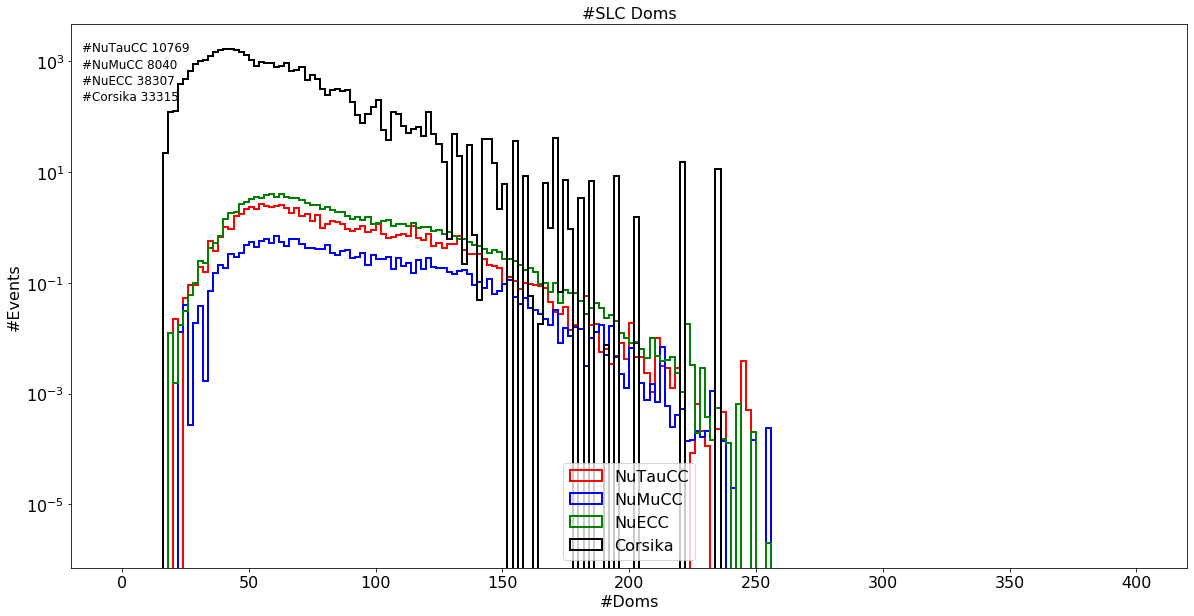

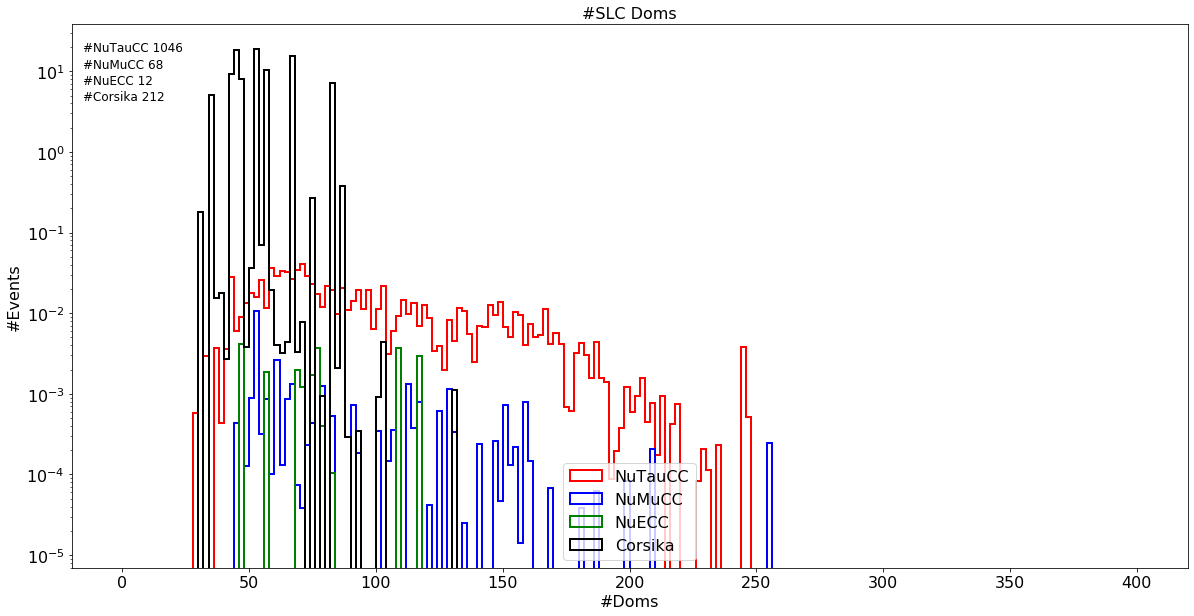

In [476]:
PlotW2("#SLC Doms","#Doms",data_t['map']['slc'],data_m['map']['slc'],data_e['map']['slc'],data_c['map']['slc'],\
      data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'], r=[0,400])
PlotW2("#SLC Doms","#Doms",data_t['map']['slc'][masks_t],data_m['map']['slc'][masks_m],data_e['map']['slc'][masks_e],\
       data_c['map']['slc'][masks_c],data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],\
       data_c['weight_val'][masks_c], r=[0,400])

In [394]:
Qst = 50
mask3_t = data_t['map']['slc'] > Qst
mask3_m = data_m['map']['slc'] > Qst
mask3_e = data_e['map']['slc'] > Qst
mask3_c = data_c['map']['slc'] > Qst
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and SLC Cut",0.99,0.8,"n1","n4","more","more",mask3_t,mask3_m,mask3_e,mask3_c)

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239
(64,)
Rates after NET1 and NET3 and SLC Cut
NuTauCC = 0.807 +/- 0.047
NuMuCC =  0.028 +/- 0.011
NuECC =   0.018 +/- 0.007
Corsika =   26.125 +/- 18.622


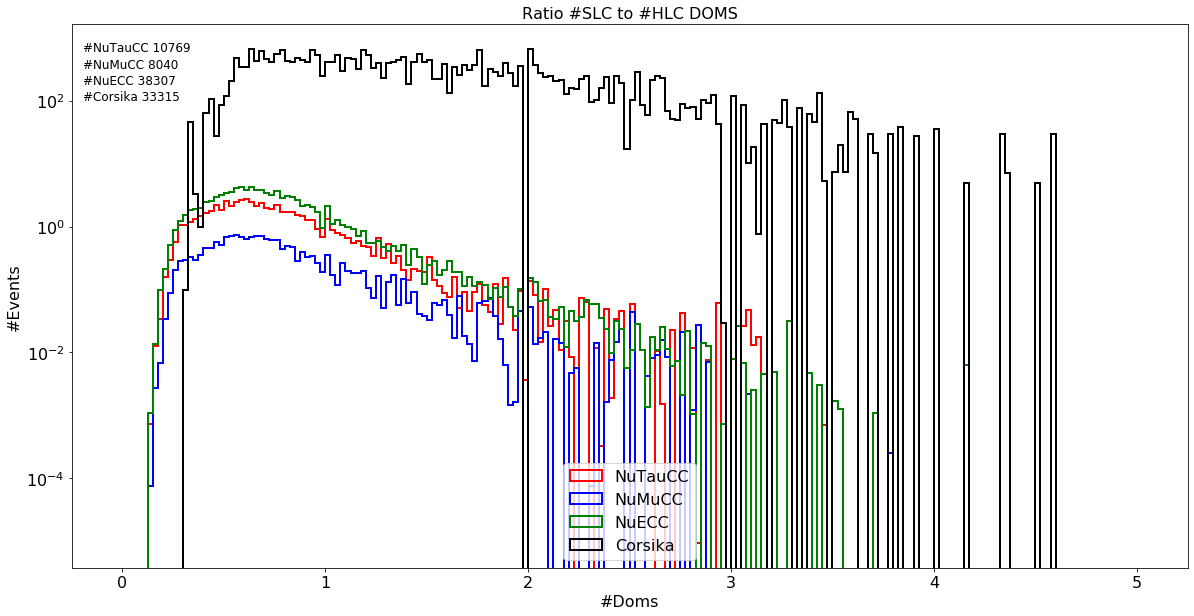

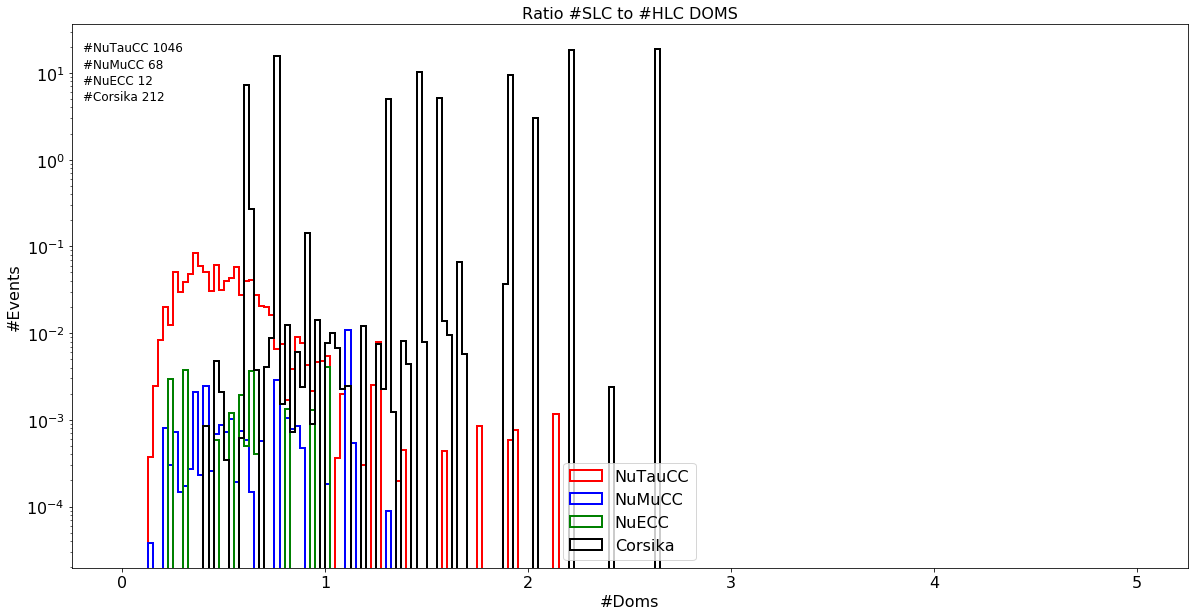

In [391]:
PlotW2("Ratio #SLC to #HLC DOMS","#Doms",data_t['map']['slc']/data_t['map']['hlc'],data_m['map']['slc']/data_m['map']['hlc'],\
       data_e['map']['slc']/data_e['map']['hlc'],data_c['map']['slc']/data_c['map']['hlc'],data_t['weight_val'],\
       data_m['weight_val'],data_e['weight_val'],data_c['weight_val'], r=[0,5])
PlotW2("Ratio #SLC to #HLC DOMS","#Doms",data_t['map']['slc'][masks_t]/data_t['map']['hlc'][masks_t],\
       data_m['map']['slc'][masks_m]/data_m['map']['hlc'][masks_m],\
       data_e['map']['slc'][masks_e]/data_e['map']['hlc'][masks_e],\
       data_c['map']['slc'][masks_c]/data_c['map']['hlc'][masks_c],data_t['weight_val'][masks_t],\
       data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],data_c['weight_val'][masks_c], r=[0,5])

In [393]:
Qst = 1
mask3_t = data_t['map']['slc']/data_t['map']['hlc'] < Qst
mask3_m = data_m['map']['slc']/data_m['map']['hlc'] < Qst
mask3_e = data_e['map']['slc']/data_e['map']['hlc'] < Qst
mask3_c = data_c['map']['slc']/data_c['map']['hlc'] < Qst
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and SLC Cut",0.99,0.8,"n1","n4","more","more",mask3_t,mask3_m,mask3_e,mask3_c)

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239
(60,)
Rates after NET1 and NET3 and SLC Cut
NuTauCC = 0.839 +/- 0.048
NuMuCC =  0.017 +/- 0.004
NuECC =   0.018 +/- 0.007
Corsika =   15.789 +/- 15.494


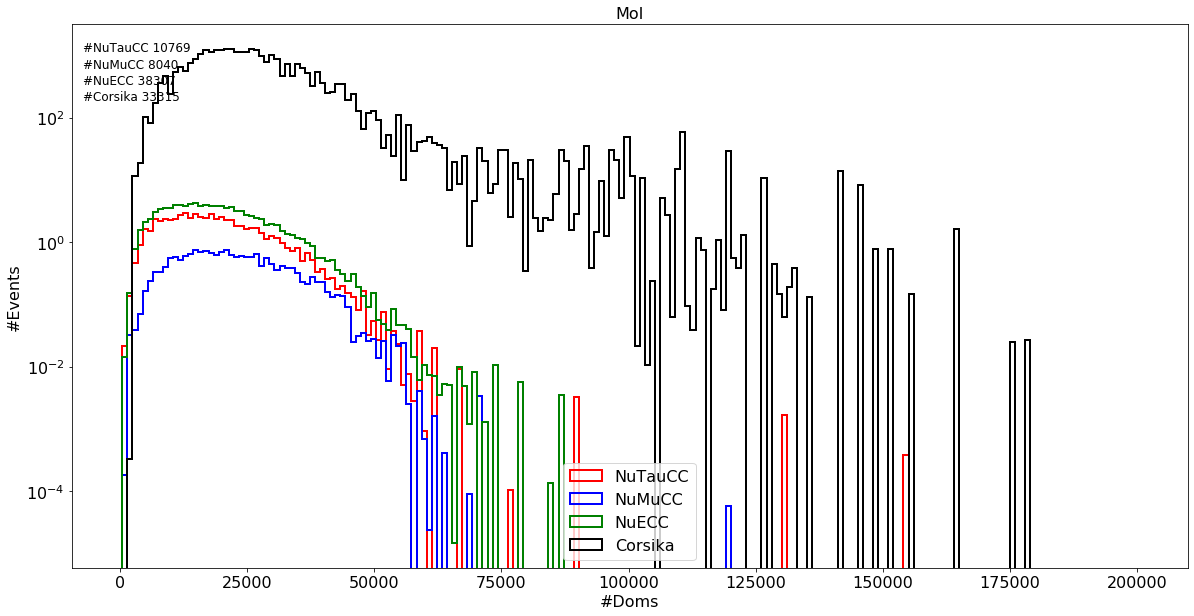

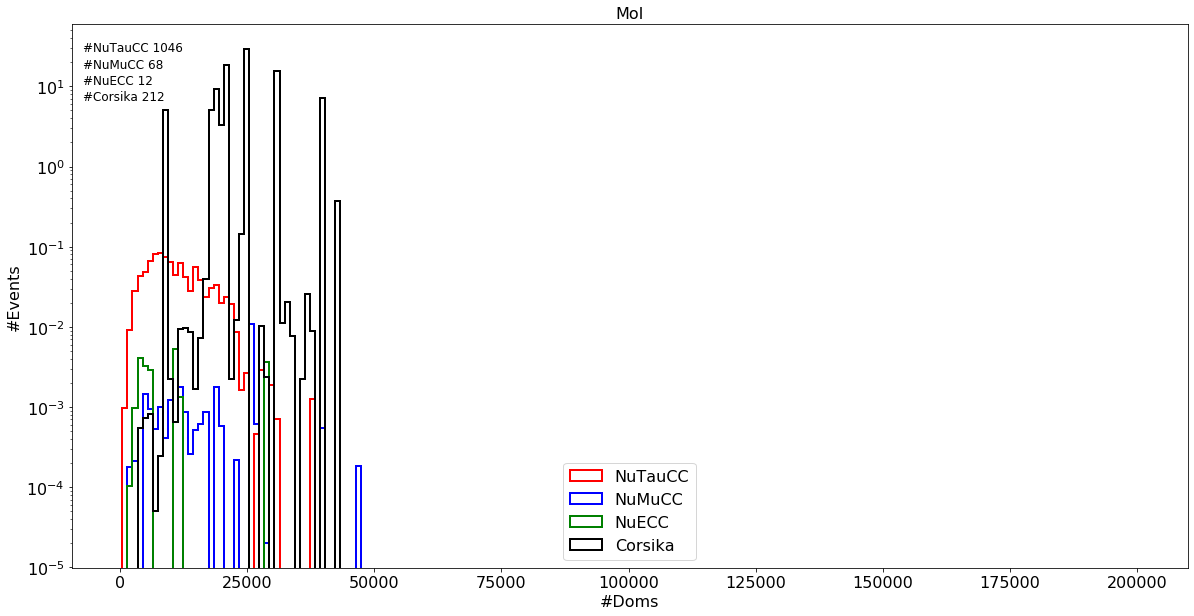

In [411]:
PlotW2("MoI","#Doms",data_t['moi']/data_t['qtot'],data_m['moi']/data_m['qtot'],data_e['moi']/data_e['qtot'],\
       data_c['moi']/data_c['qtot'],data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'], r=[400,200000])
PlotW2("MoI","#Doms",data_t['moi'][masks_t]/data_t['qtot'][masks_t],data_m['moi'][masks_m]/data_m['qtot'][masks_m],\
       data_e['moi'][masks_e]/data_e['qtot'][masks_e],data_c['moi'][masks_c]/data_c['qtot'][masks_c],data_t['weight_val'][masks_t],\
       data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],data_c['weight_val'][masks_c], r=[400,200000])

In [413]:
Qst = 25000
mask3_t = data_t['moi']/data_t['qtot'] < Qst
mask3_m = data_m['moi']/data_m['qtot'] < Qst
mask3_e = data_e['moi']/data_e['qtot'] < Qst
mask3_c = data_c['moi']/data_c['qtot'] < Qst
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and MoI cut",0.99,0.8,"n1","n4","more","more",mask3_t,mask3_m,mask3_e,mask3_c)

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239
(80,)
Rates after NET1 and NET3 and MoI cut
NuTauCC = 0.853 +/- 0.049
NuMuCC =  0.016 +/- 0.004
NuECC =   0.018 +/- 0.007
Corsika =   33.173 +/- 15.956


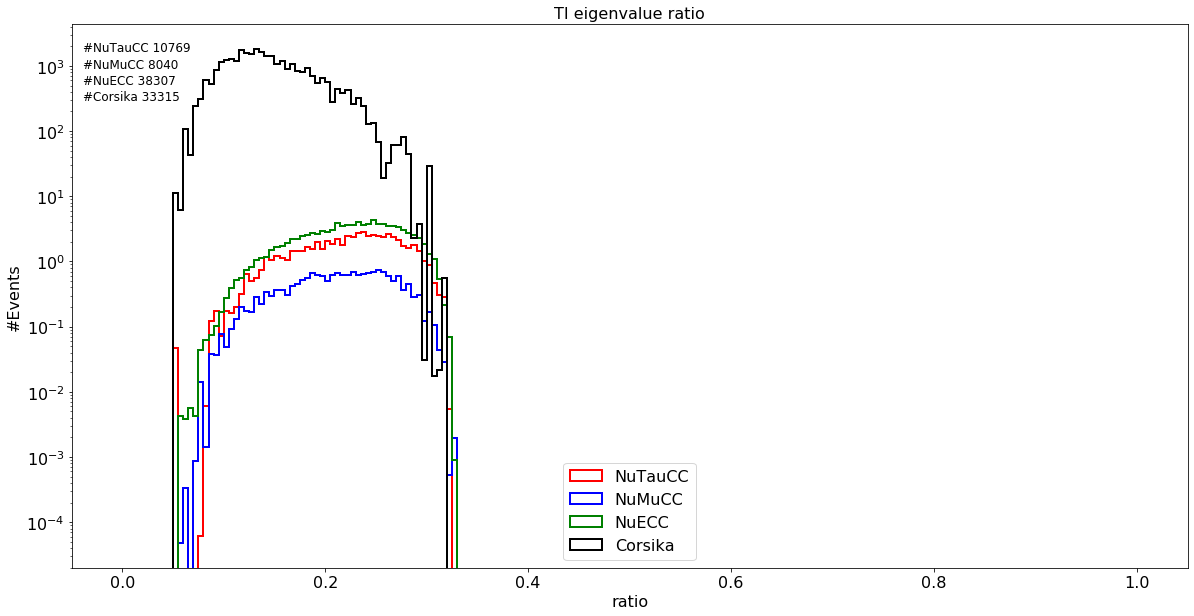

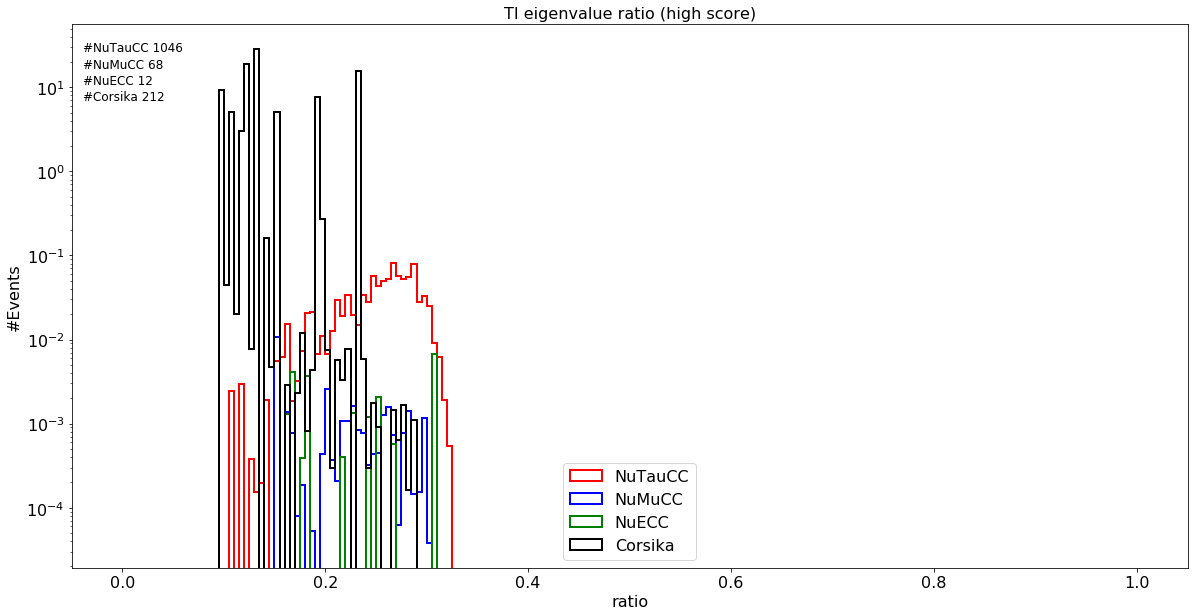

In [415]:
PlotW2("TI eigenvalue ratio","ratio",data_t['ti'][:,1],data_m['ti'][:,1],data_e['ti'][:,1],data_c['ti'][:,1],\
     data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val'], r=[0,1])
PlotW2("TI eigenvalue ratio (high score)","ratio",data_t['ti'][:,1][masks_t],data_m['ti'][:,1][masks_m],data_e['ti'][:,1][masks_e],\
     data_c['ti'][:,1][masks_c],data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],\
     data_c['weight_val'][masks_c], r=[0,1])


In [421]:
Qst = 0.18
mask3_t = data_t['ti'][:,1] > Qst
mask3_m = data_m['ti'][:,1] > Qst
mask3_e = data_e['ti'][:,1] > Qst
mask3_c = data_c['ti'][:,1] > Qst
GetRates3("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M("Rates after NET1 and NET3 and TI ratio cut",0.99,0.8,"n1","n4","more","more",mask3_t,mask3_m,mask3_e,mask3_c)

(93,)
Rates after NET1 and NET3
NuTauCC = 0.862 +/- 0.049
NuMuCC =  0.028 +/- 0.011
NuECC =   0.022 +/- 0.008
Corsika =   48.679 +/- 22.239
(49,)
Rates after NET1 and NET3 and TI ratio cut
NuTauCC = 0.814 +/- 0.047
NuMuCC =  0.016 +/- 0.004
NuECC =   0.016 +/- 0.007
Corsika =   15.778 +/- 15.494


In [422]:
def Corr(Name,label_x,label_y,x,y,c):
    fig = plt.figure(figsize=(10, 10),facecolor ='w')
    ax = fig.add_subplot()
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
   
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#Events '+str(len(x)), transform=ax.transAxes, color = "black",fontsize=12)
    
    ax.set_xlabel(label_x, fontsize = 16)                                                              
    ax.set_ylabel(label_y, fontsize = 16)                                                   
    ax.scatter(x,y, s=1,color = c)  
    plt.show()

In [456]:
#import seaborn as sns
import pandas as pd 

In [ ]:
# creating the Numpy array 

data_t_label = ['0']*len(data_t)
array_t = np.array([data_t['preds']['n4'],data_t_label, data_t['qtot'],data_t['qst']['q'][:,0],data_t['qst']['q'][:,1],\
                  data_t['qst']['q'][:,2], data_t['logan_veto']['FirstHitZ'],data_t['logan_veto']['LeastDistanceToPolygon_Veto'],\
                  data_t['logan_veto']['VHESelfVetoVertexPosZ'],data_t['map']['hlc'],data_t['ti'][:,1]]).T 
arrs =  array_t

data_m_label = ['1']*len(data_m)
array_m = np.array([data_m['preds']['n4'],data_m_label, data_m['qtot'],data_m['qst']['q'][:,0],data_m['qst']['q'][:,1],\
                  data_m['qst']['q'][:,2], data_m['logan_veto']['FirstHitZ'],data_m['logan_veto']['LeastDistanceToPolygon_Veto'],\
                  data_m['logan_veto']['VHESelfVetoVertexPosZ'],data_m['map']['hlc'],data_m['ti'][:,1]]).T 
arrs =  np.append(arrs,array_m, axis = 0)

data_e_label = ['2']*len(data_e)
array_e = np.array([data_e['preds']['n4'],data_e_label, data_e['qtot'],data_e['qst']['q'][:,0],data_e['qst']['q'][:,1],\
                  data_e['qst']['q'][:,2], data_e['logan_veto']['FirstHitZ'],data_e['logan_veto']['LeastDistanceToPolygon_Veto'],\
                  data_e['logan_veto']['VHESelfVetoVertexPosZ'],data_e['map']['hlc'],data_e['ti'][:,1]]).T 
arrs =  np.append(arrs,array_e, axis = 0)

data_c_label = ['3']*len(data_c)
array_c = np.array([data_c['preds']['n4'],data_c_label, data_c['qtot'],data_c['qst']['q'][:,0],data_c['qst']['q'][:,1],\
                  data_c['qst']['q'][:,2], data_c['logan_veto']['FirstHitZ'],data_c['logan_veto']['LeastDistanceToPolygon_Veto'],\
                  data_c['logan_veto']['VHESelfVetoVertexPosZ'],data_c['map']['hlc'],data_c['ti'][:,1]]).T 
arrs =  np.append(arrs,array_c, axis = 0)

# creating a list of index names 
index_values = range(len(data_t))
# creating a list of column names 
column_values = ['n4','label', 'qtot', 'qst1','qst2','qst3', 'firsthitZ','LeastDistPol' ,'SVPozZ', 'hlc','ti'] 
# creating the dataframe 
df = pd.DataFrame(data = array_t,  index = index_values, columns = column_values) 
for i in column_values:
    np.any([isinstance(val, str) for val in df[i]])  
# displaying the dataframe 
#df.head() 
#for i in range(len(array_t)):
#    for j in range(len(array_t[i])):
#        if type(array_t[i,j]) == str or np.isnan(array_t[i,j]):
#            print(array_t[i,j])
#grr = pd.plotting.scatter_matrix(df)
sns.pairplot(df, hue="label")
#for i in column_values:
#    print(i, np.any([isinstance(val, str) for val in df[i]]))

In [509]:
def GetRates3M_1(Name,cut1,cut2,net1,net2,sign1,sign2,mask_t0):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_ht['preds'][net1] >= cut1) & (data_ht['preds'][net2] >= cut2) & mask_t0
    elif (sign1 == "more"):
        mask_t = (data_ht['preds'][net1] >= cut1) & (data_ht['preds'][net2] <= cut2) & mask_t0
    elif (sign2 == "more"):
        mask_t = (data_ht['preds'][net1] <= cut1) & (data_ht['preds'][net2] >= cut2) & mask_t0
    else:
        mask_t = (data_ht['preds'][net1] <= cut1) & (data_ht['preds'][net2] <= cut2) & mask_t0

    rate_t = np.sum(data_ht['weight_val'][mask_t]/10) 
    rate_t_err = np.sqrt(np.sum(np.square(data_ht['weight_val'][mask_t]/10))) 
    #print(data_c[mask_c])

    print(Name)
  
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))
    
def GetRates3M_2(Name,cut1,cut2,net1,net2,sign1,sign2):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_ht['preds'][net1] >= cut1) & (data_ht['preds'][net2] >= cut2) 
    elif (sign1 == "more"):
        mask_t = (data_ht['preds'][net1] >= cut1) & (data_ht['preds'][net2] <= cut2) 
    elif (sign2 == "more"):
        mask_t = (data_ht['preds'][net1] <= cut1) & (data_ht['preds'][net2] >= cut2) 
    else:
        mask_t = (data_ht['preds'][net1] <= cut1) & (data_ht['preds'][net2] <= cut2) 

    rate_t = np.sum(data_ht['weight_val'][mask_t]/10) 
    rate_t_err = np.sqrt(np.sum(np.square(data_ht['weight_val'][mask_t]/10))) 
    #print(data_c[mask_c])

    print(Name)
  
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))

In [513]:
#HESE test
data_ht = np.load('/fastio2/dasha/double_pulse/data_hese_test_BUMP3_NuTau_1_1_.npy')

In [524]:
mask3_t = data_ht['hese3']['vheselfveto'] == False
mask4_t = data_ht['hese4']['vheselfveto'] == False
mask5_t = data_ht['hese5']['vheselfveto'] == False
mask6_t = data_ht['hese6']['vheselfveto'] == False
mask7_t = data_ht['hese7']['vheselfveto'] == False
mask8_t = data_ht['hese8']['vheselfveto'] == False
mask9_t = data_ht['hese9']['vheselfveto'] == False
mask10_t = data_ht['hese10']['vheselfveto'] == False
mask11_t = data_ht['hese11']['vheselfveto'] == False
mask12_t = data_ht['hese12']['vheselfveto'] == False

GetRates3M_2("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 3",0.99,0.8,"n1","n4","more","more",mask3_t)
print("Percent passed: {0:.2f}%".format(sum(mask3_t)/data_ht.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 4",0.99,0.8,"n1","n4","more","more",mask4_t)
print("Percent passed: {0:.2f}%".format(sum(mask4_t)/data_ht.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 5",0.99,0.8,"n1","n4","more","more",mask5_t)
print("Percent passed: {0:.2f}%".format(sum(mask5_t)/data_ht.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 6",0.99,0.8,"n1","n4","more","more",mask6_t)
print("Percent passed: {0:.2f}%".format(sum(mask6_t)/data_ht.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 8",0.99,0.8,"n1","n4","more","more",mask7_t)
print("Percent passed: {0:.2f}%".format(sum(mask7_t)/data_ht.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 10",0.99,0.8,"n1","n4","more","more",mask8_t)
print("Percent passed: {0:.2f}%".format(sum(mask8_t)/data_ht.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 15",0.99,0.8,"n1","n4","more","more",mask9_t)
print("Percent passed: {0:.2f}%".format(sum(mask9_t)/data_ht.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 30",0.99,0.8,"n1","n4","more","more",mask10_t)
print("Percent passed: {0:.2f}%".format(sum(mask10_t)/data_ht.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 50",0.99,0.8,"n1","n4","more","more",mask11_t)
print("Percent passed: {0:.2f}%".format(sum(mask11_t)/data_ht.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 100",0.99,0.8,"n1","n4","more","more",mask12_t)
print("Percent passed: {0:.2f}%".format(sum(mask12_t)/data_ht.shape[0]*100))


print(data_ht['qtot'][mask3_t][:100])

Rates after NET1 and NET3
NuTauCC = 0.089 +/- 0.002
Rates after NET1 and NET3 and HESE veto Cut = 3
NuTauCC = 0.040 +/- 0.001
Percent passed: 37.24%
Rates after NET1 and NET3 and HESE veto Cut = 4
NuTauCC = 0.040 +/- 0.001
Percent passed: 37.53%
Rates after NET1 and NET3 and HESE veto Cut = 5
NuTauCC = 0.041 +/- 0.001
Percent passed: 37.74%
Rates after NET1 and NET3 and HESE veto Cut = 6
NuTauCC = 0.041 +/- 0.001
Percent passed: 37.93%
Rates after NET1 and NET3 and HESE veto Cut = 8
NuTauCC = 0.041 +/- 0.001
Percent passed: 38.21%
Rates after NET1 and NET3 and HESE veto Cut = 10
NuTauCC = 0.041 +/- 0.001
Percent passed: 38.44%
Rates after NET1 and NET3 and HESE veto Cut = 15
NuTauCC = 0.041 +/- 0.001
Percent passed: 38.91%
Rates after NET1 and NET3 and HESE veto Cut = 30
NuTauCC = 0.042 +/- 0.001
Percent passed: 39.78%
Rates after NET1 and NET3 and HESE veto Cut = 50
NuTauCC = 0.043 +/- 0.001
Percent passed: 40.60%
Rates after NET1 and NET3 and HESE veto Cut = 100
NuTauCC = 0.043 +/- 0

In [655]:
def Scatter2d_2(data_t1,data_t2,data_e1,data_e2,l1=[0,1],l2=[0,1], label1 ="label",label2="label"):
    fig, ax = plt.subplots(nrows=1, ncols=2,sharex = True,sharey=True, figsize=(20,10),facecolor ='w')
  
    plt.subplot(1,2,1)
    ax1 = plt.gca()
    ax1.set_xlim(l1)
    ax1.set_ylim(l2)
    ax1.set_title('Pass')
    plt.scatter(data_t1,data_t2, c = 'g', s =0.9)
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax1.tick_params(axis='both', which='major', labelsize=10)
    ax1.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(1,2,2)
    ax2 = plt.gca()
    ax2.set_xlim(l1)
    ax2.set_ylim(l2)
    ax2.set_title('NoPass')
    plt.scatter(data_e1,data_e2, c = 'b', s =0.9)
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax2.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='both', which='minor', labelsize=8)
    
def PlotW2_2(Name,Label,data_t,data_m,weight_t,weight_m,xscale='linear',b =200,r =[0,1], loc =8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('linear')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'Pass '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.90,'NoPass '+str(len(data_m)), transform=ax.transAxes, color = "black",fontsize=12)
   
    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.hist(data_t, bins =b, weights = weight_t, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "Pass")  
    ax.hist(data_m, bins =b, weights = weight_m, histtype = 'step',edgecolor ='b', lw =2, range = r, label = "No Pass")  
    
    plt.legend(loc=loc)

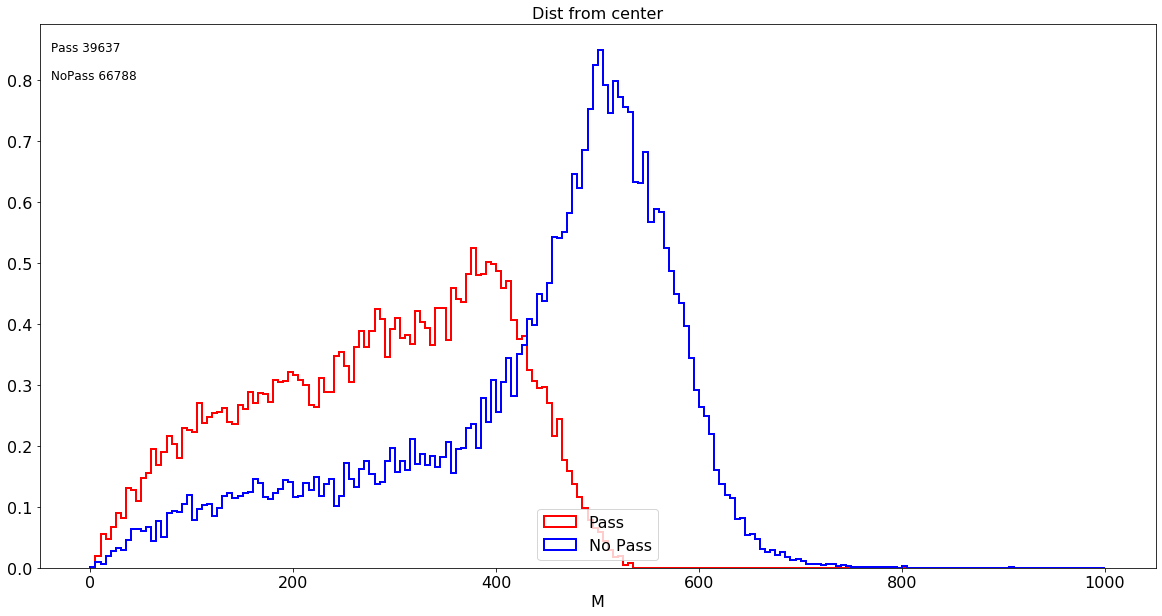

In [686]:
mask_he_t = data_ht['hese3']['vheselfveto'] == False
r = np.sqrt(data_ht['prim_daughter']['position'][:,0]**2+data_ht['prim_daughter']['position'][:,1]**2)#+data_ht['prim_daughter']['position'][:,2]**2)
PlotW2_2("Dist from center","M",r[mask_he_t],r[~mask_he_t],data_ht[mask_he_t]['weight_val'],data_ht[~mask_he_t]['weight_val'],\
        r = [0,1000])

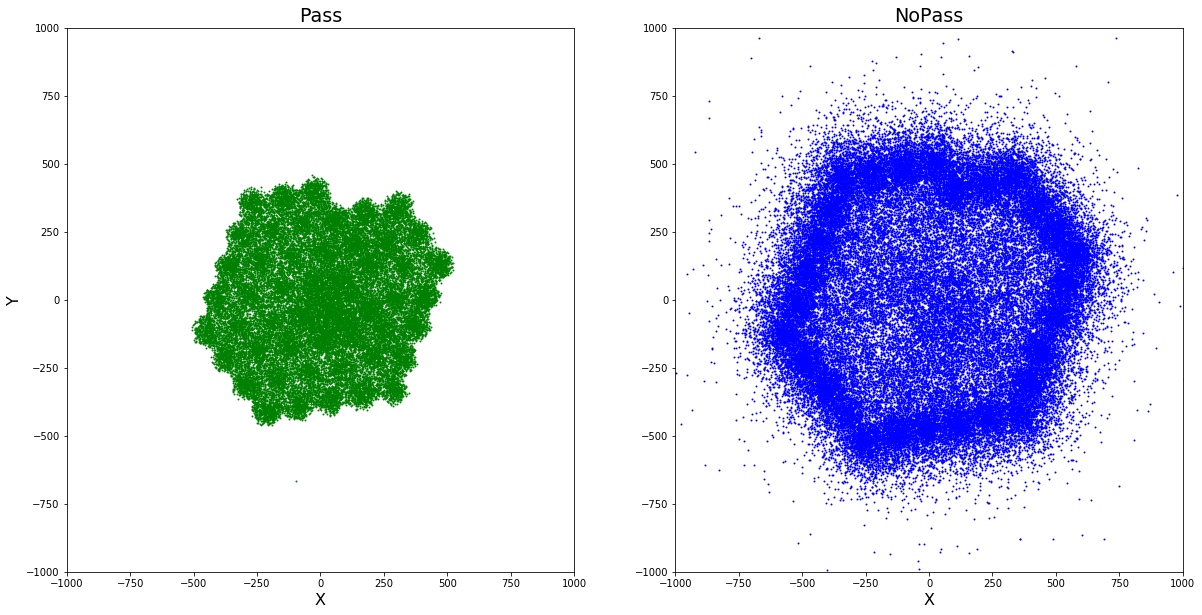

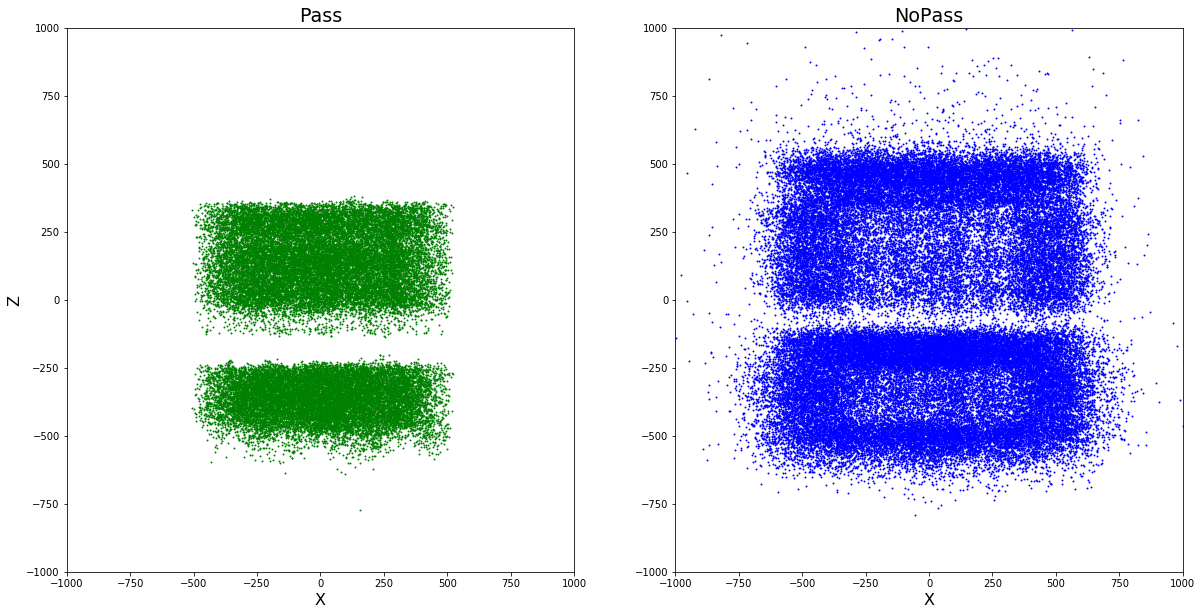

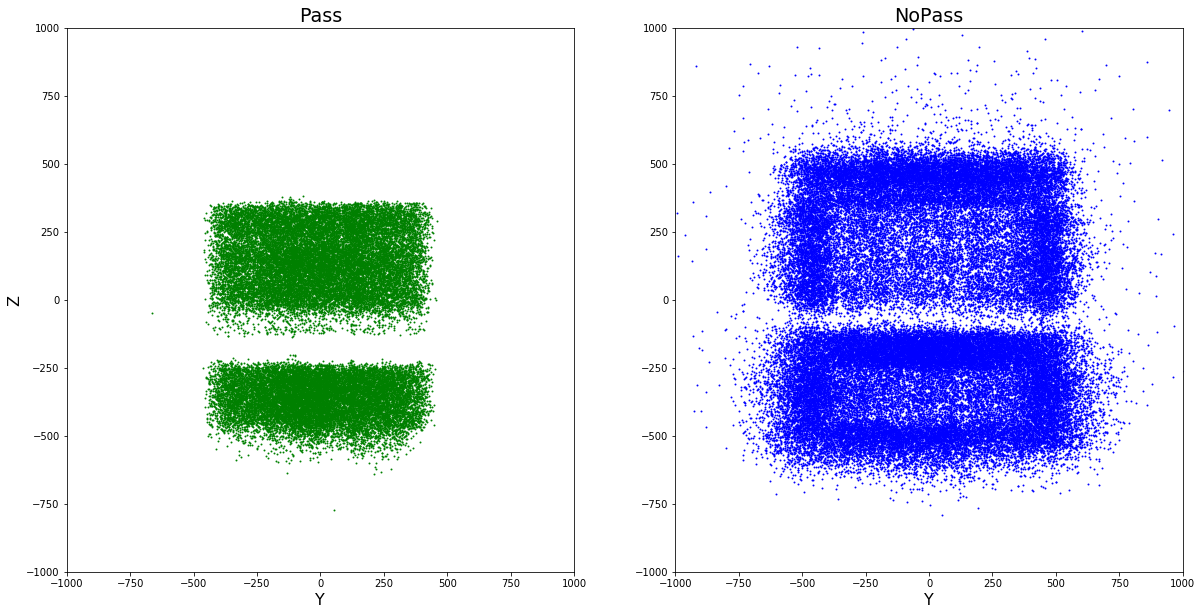

In [669]:
Scatter2d_2(data_ht[mask_he_t]['prim_daughter']['position'][:,0],data_ht[mask_he_t]['prim_daughter']['position'][:,1],\
            data_ht[~mask_he_t]['prim_daughter']['position'][:,0],data_ht[~mask_he_t]['prim_daughter']['position'][:,1],\
            label1="X", label2="Y",l1= [-1000,1000],l2 =[-1000,1000])
Scatter2d_2(data_ht[mask_he_t]['prim_daughter']['position'][:,0],data_ht[mask_he_t]['prim_daughter']['position'][:,2],\
            data_ht[~mask_he_t]['prim_daughter']['position'][:,0],data_ht[~mask_he_t]['prim_daughter']['position'][:,2],\
            label1="X", label2="Z",l1= [-1000,1000],l2 =[-1000,1000])
Scatter2d_2(data_ht[mask_he_t]['prim_daughter']['position'][:,1],data_ht[mask_he_t]['prim_daughter']['position'][:,2],\
            data_ht[~mask_he_t]['prim_daughter']['position'][:,1],data_ht[~mask_he_t]['prim_daughter']['position'][:,2],\
            label1="Y", label2="Z",l1= [-1000,1000],l2 =[-1000,1000])

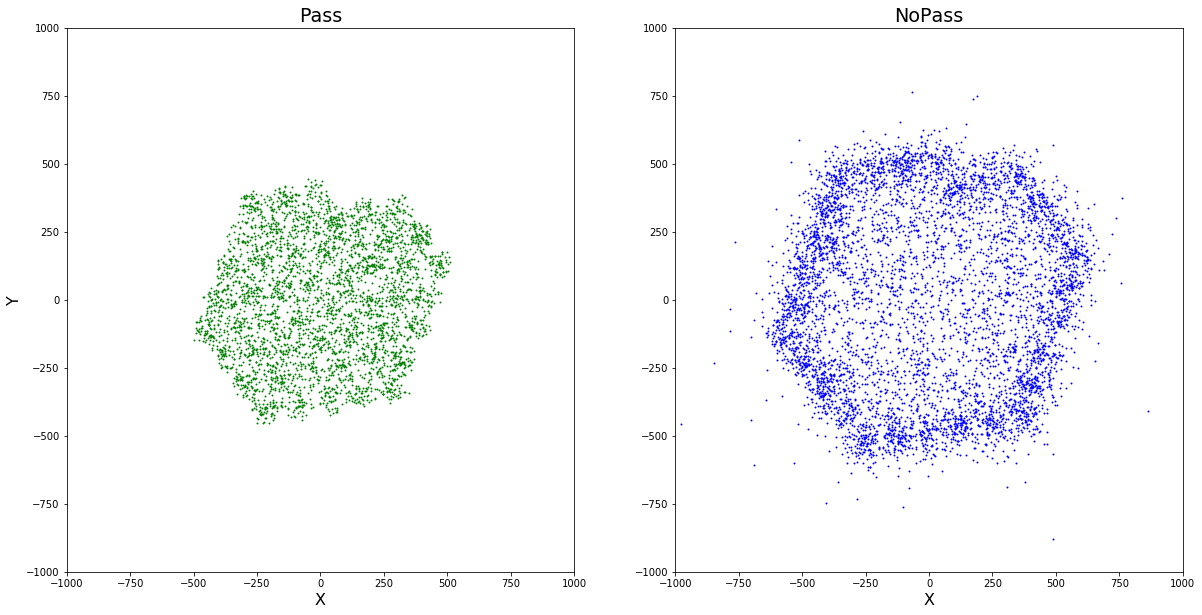

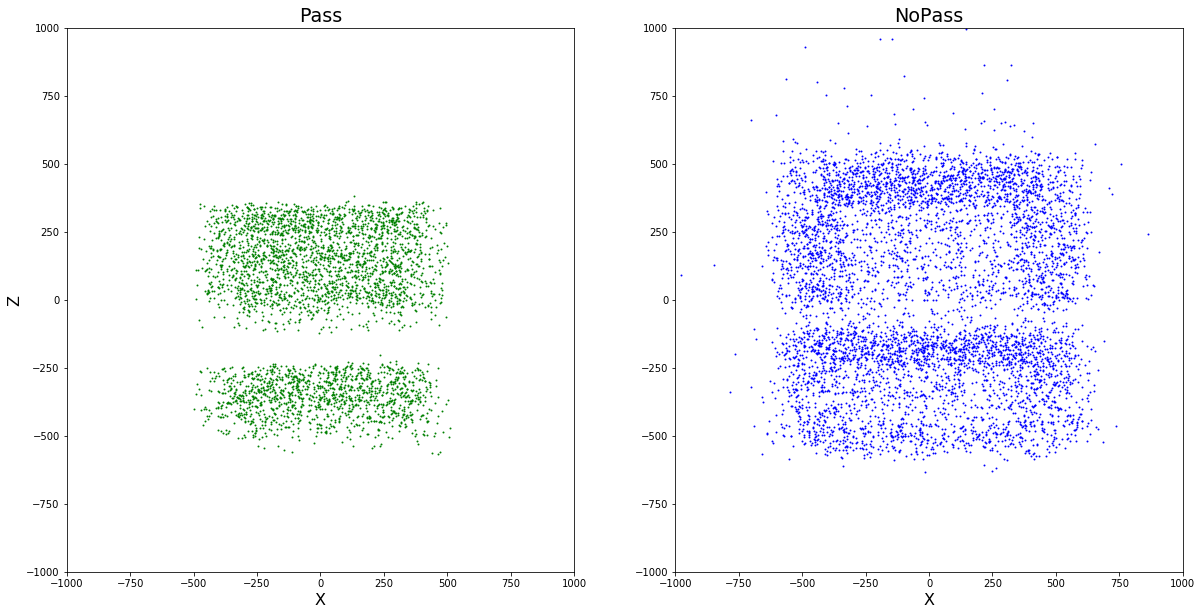

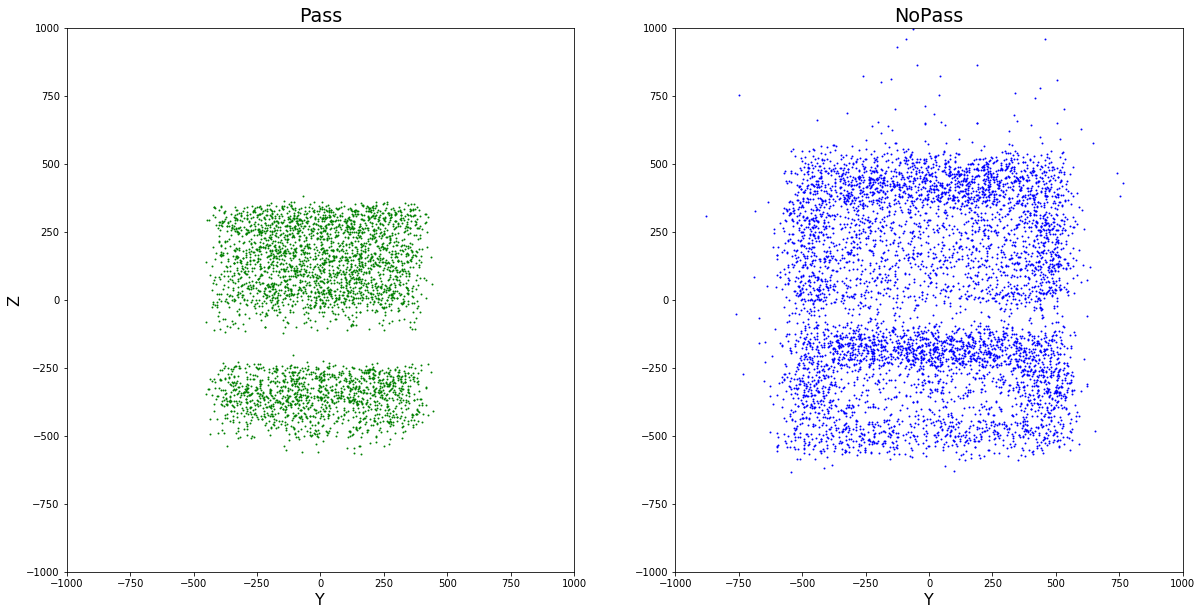

In [670]:
maskc_t = (data_ht['preds']['n1'] >= 0.99) & (data_ht['preds']['n4'] >= 0.8)

Scatter2d_2(data_ht[mask_he_t&maskc_t]['prim_daughter']['position'][:,0],data_ht[mask_he_t&maskc_t]['prim_daughter']['position'][:,1],\
            data_ht[~mask_he_t&maskc_t]['prim_daughter']['position'][:,0],data_ht[~mask_he_t&maskc_t]['prim_daughter']['position'][:,1],\
            label1="X", label2="Y",l1= [-1000,1000],l2 =[-1000,1000])
Scatter2d_2(data_ht[mask_he_t&maskc_t]['prim_daughter']['position'][:,0],data_ht[mask_he_t&maskc_t]['prim_daughter']['position'][:,2],\
            data_ht[~mask_he_t&maskc_t]['prim_daughter']['position'][:,0],data_ht[~mask_he_t&maskc_t]['prim_daughter']['position'][:,2],\
            label1="X", label2="Z",l1= [-1000,1000],l2 =[-1000,1000])
Scatter2d_2(data_ht[mask_he_t&maskc_t]['prim_daughter']['position'][:,1],data_ht[mask_he_t&maskc_t]['prim_daughter']['position'][:,2],\
            data_ht[~mask_he_t&maskc_t]['prim_daughter']['position'][:,1],data_ht[~mask_he_t&maskc_t]['prim_daughter']['position'][:,2],\
            label1="Y", label2="Z",l1= [-1000,1000],l2 =[-1000,1000])

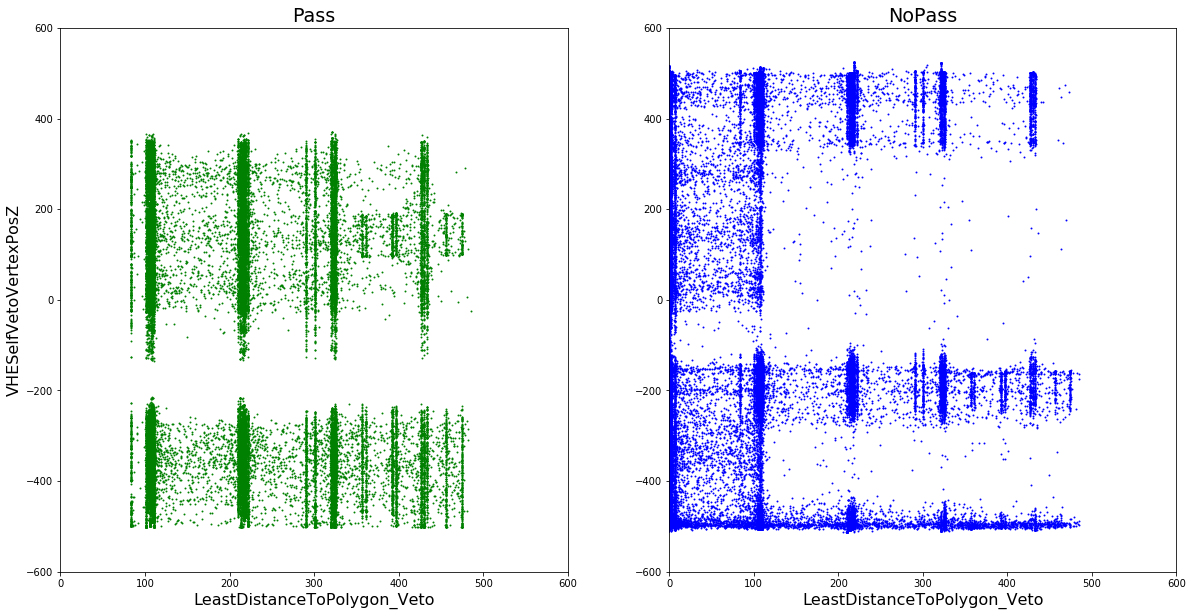

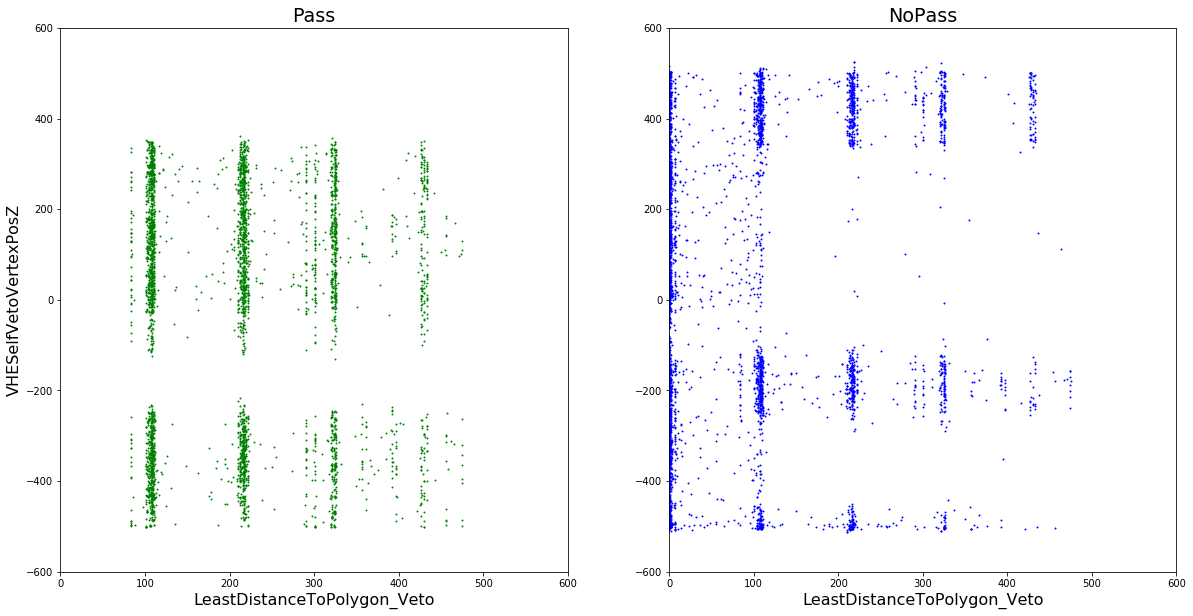

In [685]:
Scatter2d_2(data_ht[mask_he_t]['logan_veto']["LeastDistanceToPolygon_Veto"],data_ht[mask_he_t]['logan_veto']['VHESelfVetoVertexPosZ'],\
            data_ht[~mask_he_t]['logan_veto']["LeastDistanceToPolygon_Veto"],data_ht[~mask_he_t]['logan_veto']['VHESelfVetoVertexPosZ'],\
            label1="LeastDistanceToPolygon_Veto", label2="VHESelfVetoVertexPosZ",l1= [0,600],l2 =[-600,600])
Scatter2d_2(data_ht[mask_he_t&maskc_t]['logan_veto']["LeastDistanceToPolygon_Veto"],data_ht[mask_he_t&maskc_t]['logan_veto']['VHESelfVetoVertexPosZ'],\
            data_ht[~mask_he_t&maskc_t]['logan_veto']["LeastDistanceToPolygon_Veto"],data_ht[~mask_he_t&maskc_t]['logan_veto']['VHESelfVetoVertexPosZ'],\
            label1="LeastDistanceToPolygon_Veto", label2="VHESelfVetoVertexPosZ",l1= [0,600],l2 =[-600,600])

In [674]:
#HESE test
data_ht2 = np.load('/fastio2/dasha/double_pulse/data_hese_test_2BUMP3_NuTau_1_1_.npy')

In [676]:
mask3_t2 = data_ht2['hese3']['vheselfveto'] == False
mask4_t2 = data_ht2['hese4']['vheselfveto'] == False
mask5_t2 = data_ht2['hese5']['vheselfveto'] == False
mask6_t2 = data_ht2['hese6']['vheselfveto'] == False
mask7_t2 = data_ht2['hese7']['vheselfveto'] == False
mask8_t2 = data_ht2['hese8']['vheselfveto'] == False
mask9_t2 = data_ht2['hese9']['vheselfveto'] == False
mask10_t2 = data_ht2['hese10']['vheselfveto'] == False
mask11_t2 = data_ht2['hese11']['vheselfveto'] == False
mask12_t2 = data_ht2['hese12']['vheselfveto'] == False

GetRates3M_2("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 3",0.99,0.8,"n1","n4","more","more",mask3_t2)
print("Percent passed: {0:.2f}%".format(sum(mask3_t2)/data_ht2.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 4",0.99,0.8,"n1","n4","more","more",mask4_t2)
print("Percent passed: {0:.2f}%".format(sum(mask4_t2)/data_ht2.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 5",0.99,0.8,"n1","n4","more","more",mask5_t2)
print("Percent passed: {0:.2f}%".format(sum(mask5_t2)/data_ht2.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 6",0.99,0.8,"n1","n4","more","more",mask6_t2)
print("Percent passed: {0:.2f}%".format(sum(mask6_t2)/data_ht2.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 8",0.99,0.8,"n1","n4","more","more",mask7_t2)
print("Percent passed: {0:.2f}%".format(sum(mask7_t2)/data_ht2.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 10",0.99,0.8,"n1","n4","more","more",mask8_t2)
print("Percent passed: {0:.2f}%".format(sum(mask8_t2)/data_ht2.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 15",0.99,0.8,"n1","n4","more","more",mask9_t2)
print("Percent passed: {0:.2f}%".format(sum(mask9_t2)/data_ht2.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 30",0.99,0.8,"n1","n4","more","more",mask10_t2)
print("Percent passed: {0:.2f}%".format(sum(mask10_t2)/data_ht2.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 50",0.99,0.8,"n1","n4","more","more",mask11_t2)
print("Percent passed: {0:.2f}%".format(sum(mask11_t2)/data_ht2.shape[0]*100))
GetRates3M_1("Rates after NET1 and NET3 and HESE veto Cut = 100",0.99,0.8,"n1","n4","more","more",mask12_t2)
print("Percent passed: {0:.2f}%".format(sum(mask12_t2)/data_ht2.shape[0]*100))


print(data_ht['qtot'][mask3_t2][:100])

Rates after NET1 and NET3
NuTauCC = 0.089 +/- 0.002
Rates after NET1 and NET3 and HESE veto Cut = 3
NuTauCC = 0.043 +/- 0.001
Percent passed: 46.28%
Rates after NET1 and NET3 and HESE veto Cut = 4
NuTauCC = 0.043 +/- 0.001
Percent passed: 46.46%
Rates after NET1 and NET3 and HESE veto Cut = 5
NuTauCC = 0.043 +/- 0.001
Percent passed: 46.59%
Rates after NET1 and NET3 and HESE veto Cut = 6
NuTauCC = 0.043 +/- 0.001
Percent passed: 46.70%
Rates after NET1 and NET3 and HESE veto Cut = 8
NuTauCC = 0.043 +/- 0.001
Percent passed: 46.90%
Rates after NET1 and NET3 and HESE veto Cut = 10
NuTauCC = 0.044 +/- 0.001
Percent passed: 47.08%
Rates after NET1 and NET3 and HESE veto Cut = 15
NuTauCC = 0.044 +/- 0.001
Percent passed: 47.38%
Rates after NET1 and NET3 and HESE veto Cut = 30
NuTauCC = 0.045 +/- 0.001
Percent passed: 48.00%
Rates after NET1 and NET3 and HESE veto Cut = 50
NuTauCC = 0.045 +/- 0.001
Percent passed: 48.64%
Rates after NET1 and NET3 and HESE veto Cut = 100
NuTauCC = 0.047 +/- 0

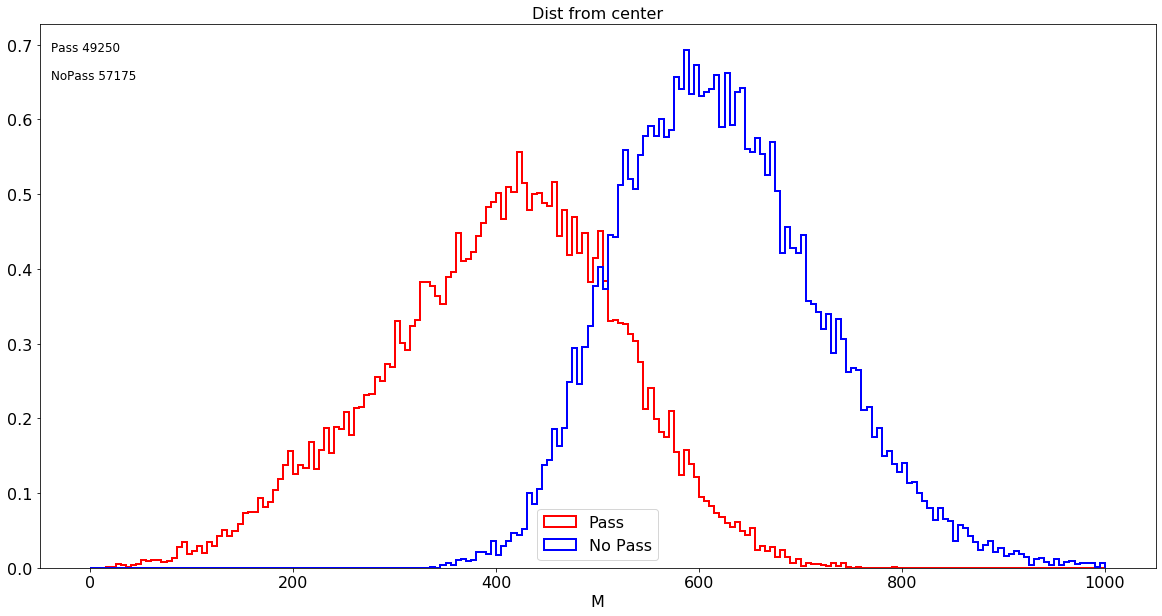

In [677]:
mask_he_t2 = data_ht2['hese3']['vheselfveto'] == False
r = np.sqrt(data_ht2['prim_daughter']['position'][:,0]**2+data_ht2['prim_daughter']['position'][:,1]**2+data_ht2['prim_daughter']['position'][:,2]**2)
PlotW2_2("Dist from center","M",r[mask_he_t2],r[~mask_he_t2],data_ht[mask_he_t2]['weight_val'],data_ht[~mask_he_t2]['weight_val'],\
        r = [0,1000])

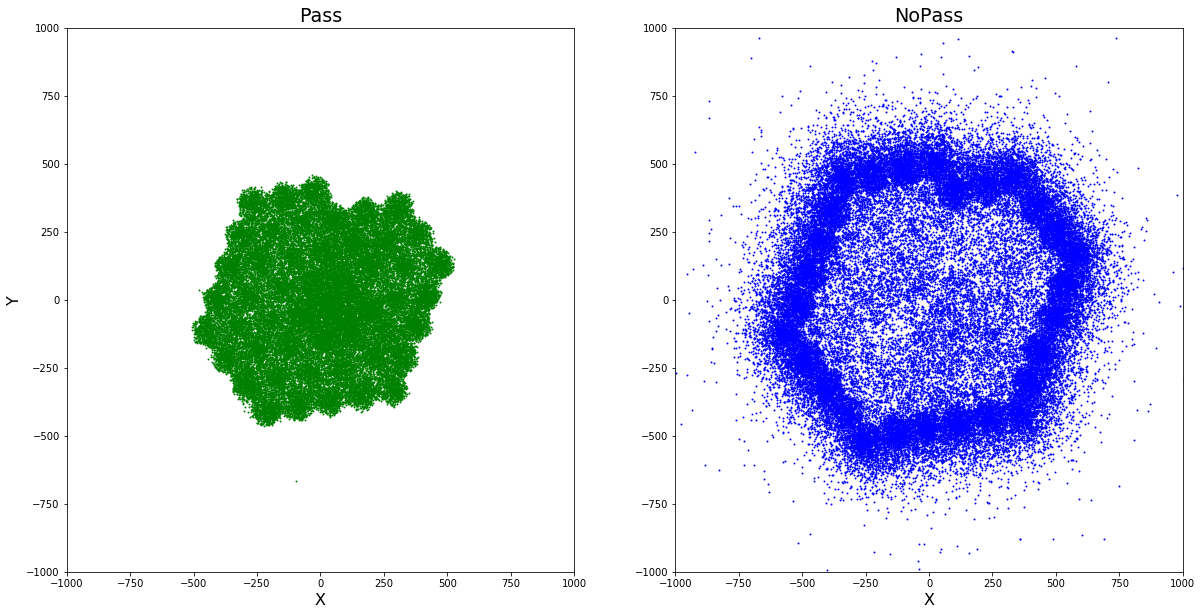

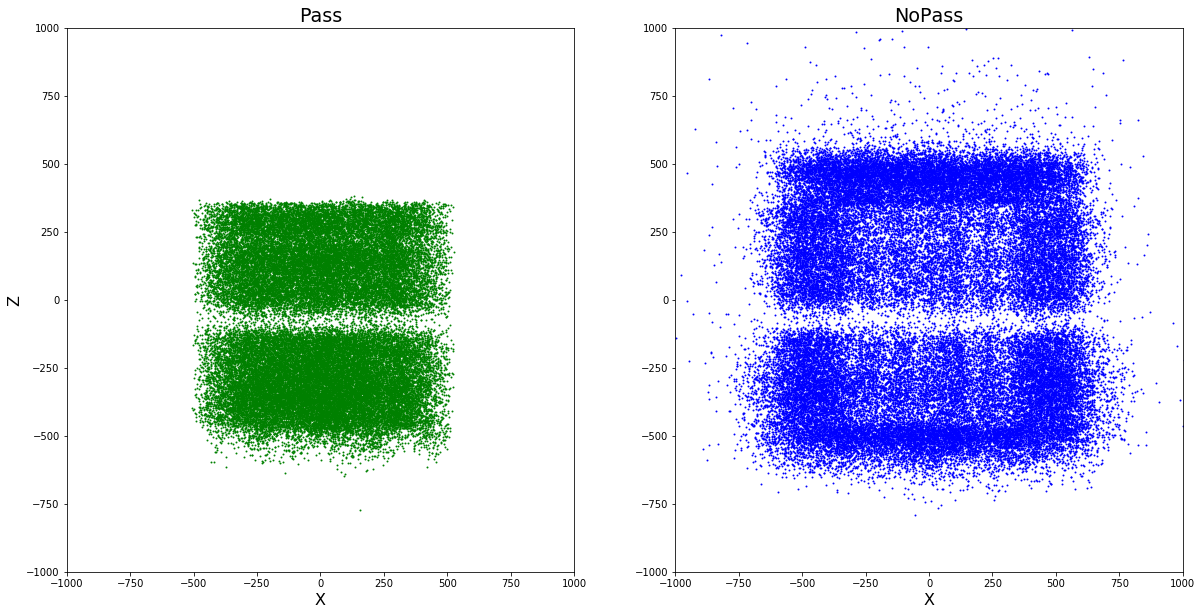

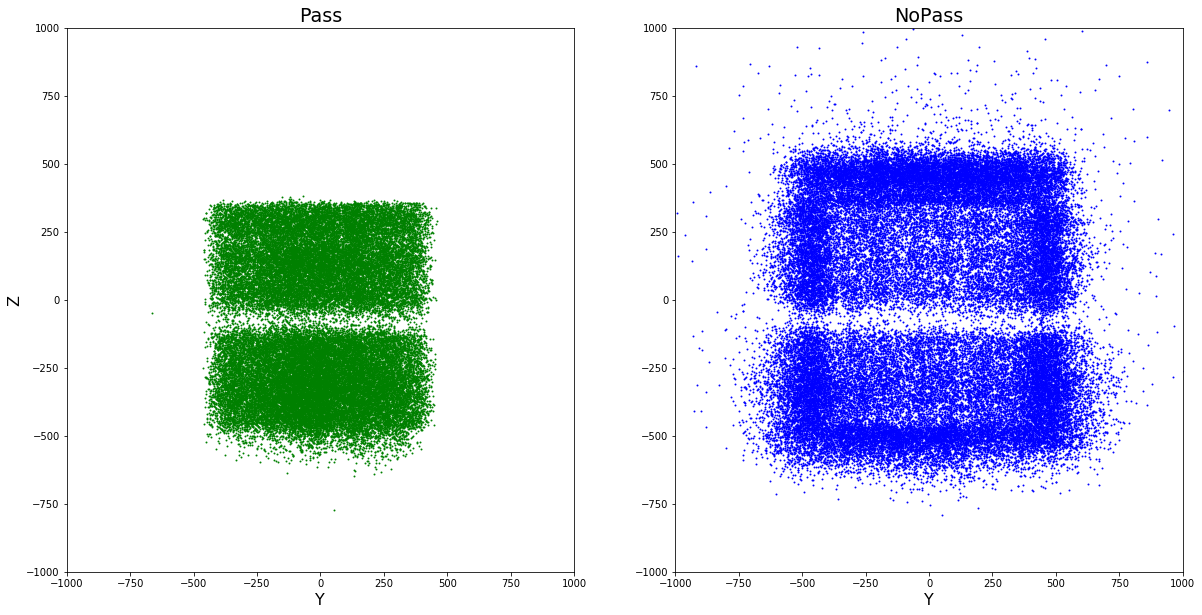

In [678]:
Scatter2d_2(data_ht2[mask_he_t2]['prim_daughter']['position'][:,0],data_ht2[mask_he_t2]['prim_daughter']['position'][:,1],\
            data_ht2[~mask_he_t2]['prim_daughter']['position'][:,0],data_ht2[~mask_he_t2]['prim_daughter']['position'][:,1],\
            label1="X", label2="Y",l1= [-1000,1000],l2 =[-1000,1000])
Scatter2d_2(data_ht2[mask_he_t2]['prim_daughter']['position'][:,0],data_ht2[mask_he_t2]['prim_daughter']['position'][:,2],\
            data_ht2[~mask_he_t2]['prim_daughter']['position'][:,0],data_ht2[~mask_he_t2]['prim_daughter']['position'][:,2],\
            label1="X", label2="Z",l1= [-1000,1000],l2 =[-1000,1000])
Scatter2d_2(data_ht2[mask_he_t2]['prim_daughter']['position'][:,1],data_ht2[mask_he_t2]['prim_daughter']['position'][:,2],\
            data_ht2[~mask_he_t2]['prim_daughter']['position'][:,1],data_ht2[~mask_he_t2]['prim_daughter']['position'][:,2],\
            label1="Y", label2="Z",l1= [-1000,1000],l2 =[-1000,1000])

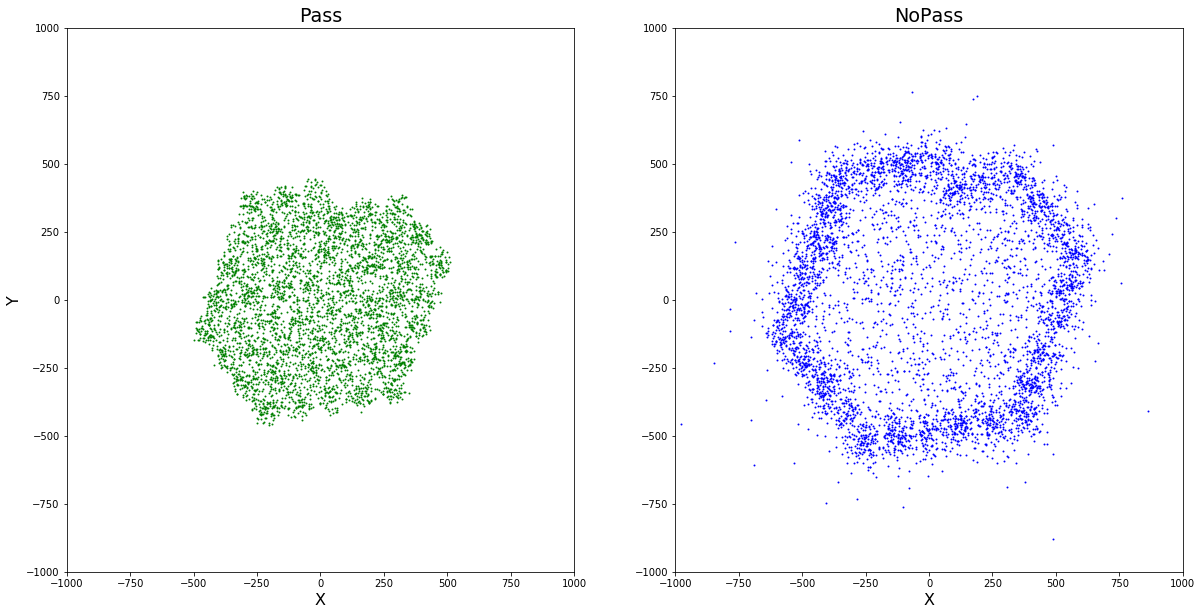

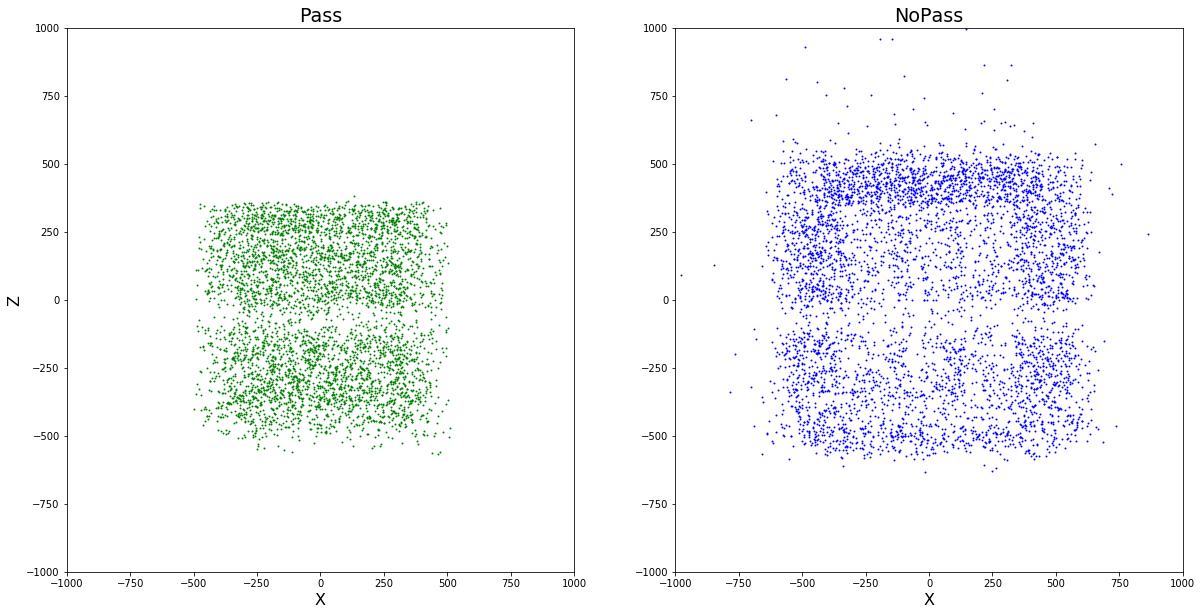

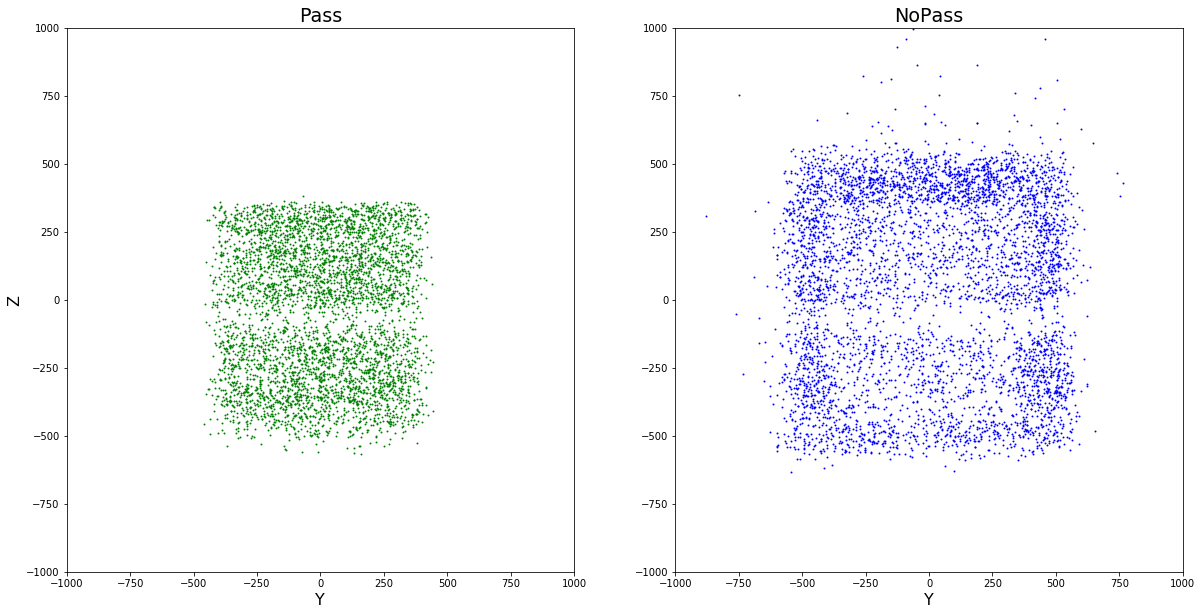

In [681]:
maskc_t2 = (data_ht2['preds']['n1'] >= 0.99) & (data_ht2['preds']['n4'] >= 0.8)

Scatter2d_2(data_ht2[mask_he_t2&maskc_t2]['prim_daughter']['position'][:,0],data_ht2[mask_he_t2&maskc_t2]['prim_daughter']['position'][:,1],\
            data_ht2[~mask_he_t2&maskc_t2]['prim_daughter']['position'][:,0],data_ht2[~mask_he_t2&maskc_t2]['prim_daughter']['position'][:,1],\
            label1="X", label2="Y",l1= [-1000,1000],l2 =[-1000,1000])
Scatter2d_2(data_ht2[mask_he_t2&maskc_t2]['prim_daughter']['position'][:,0],data_ht2[mask_he_t2&maskc_t2]['prim_daughter']['position'][:,2],\
            data_ht2[~mask_he_t2&maskc_t2]['prim_daughter']['position'][:,0],data_ht2[~mask_he_t2&maskc_t2]['prim_daughter']['position'][:,2],\
            label1="X", label2="Z",l1= [-1000,1000],l2 =[-1000,1000])
Scatter2d_2(data_ht2[mask_he_t2&maskc_t2]['prim_daughter']['position'][:,1],data_ht2[mask_he_t2&maskc_t2]['prim_daughter']['position'][:,2],\
            data_ht2[~mask_he_t2&maskc_t2]['prim_daughter']['position'][:,1],data_ht2[~mask_he_t2&maskc_t2]['prim_daughter']['position'][:,2],\
            label1="Y", label2="Z",l1= [-1000,1000],l2 =[-1000,1000])

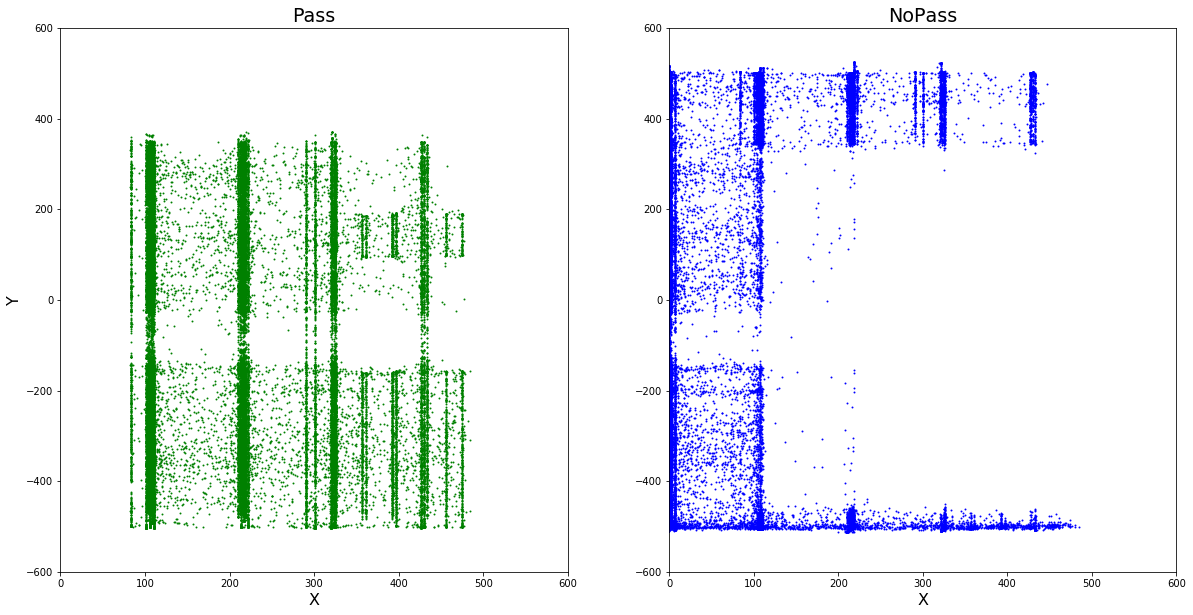

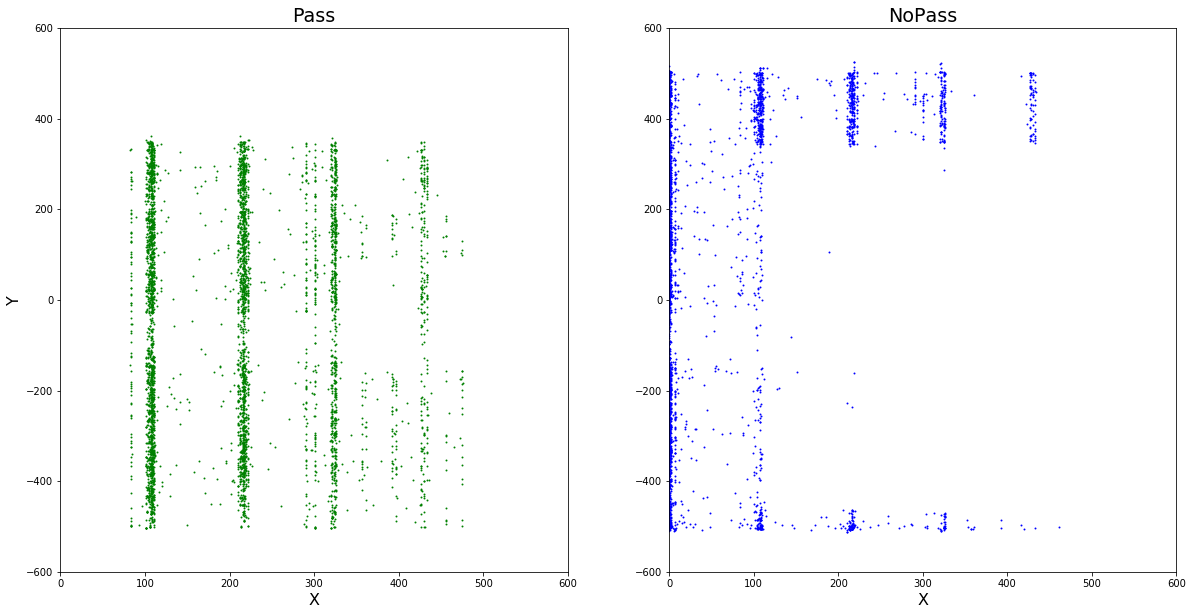

In [684]:
Scatter2d_2(data_ht2[mask_he_t2]['logan_veto']["LeastDistanceToPolygon_Veto"],data_ht2[mask_he_t2]['logan_veto']['VHESelfVetoVertexPosZ'],\
            data_ht2[~mask_he_t2]['logan_veto']["LeastDistanceToPolygon_Veto"],data_ht2[~mask_he_t2]['logan_veto']['VHESelfVetoVertexPosZ'],\
            label1="X", label2="Y",l1= [0,600],l2 =[-600,600])
Scatter2d_2(data_ht2[mask_he_t2&maskc_t2]['logan_veto']["LeastDistanceToPolygon_Veto"],data_ht2[mask_he_t2&maskc_t2]['logan_veto']['VHESelfVetoVertexPosZ'],\
            data_ht2[~mask_he_t2&maskc_t2]['logan_veto']["LeastDistanceToPolygon_Veto"],data_ht2[~mask_he_t2&maskc_t2]['logan_veto']['VHESelfVetoVertexPosZ'],\
            label1="X", label2="Y",l1= [0,600],l2 =[-600,600])